<a href="https://colab.research.google.com/github/markriis/IDS-pollution-of-cities/blob/main/descriptive_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing datasets from Data_prep.ipynb

In [1]:
# Importing modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

Setting up datasets

In [2]:
!wget https://github.com/markriis/IDS-pollution-of-cities/raw/combining/datasets.p
datasets = pickle.load(open( "datasets.p", "rb" ))# The data is already in the right format, just need to unpickle

--2023-12-10 10:35:01--  https://github.com/markriis/IDS-pollution-of-cities/raw/combining/datasets.p
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/markriis/IDS-pollution-of-cities/combining/datasets.p [following]
--2023-12-10 10:35:01--  https://raw.githubusercontent.com/markriis/IDS-pollution-of-cities/combining/datasets.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1566301 (1.5M) [application/octet-stream]
Saving to: ‘datasets.p’

datasets.p          100%[===================>]   1.49M  --.-KB/s    in 0.08s   

2023-12-10 10:35:01 (19.7 MB/s) - ‘datasets.p’ saved [1566301/1566301]



In [3]:
datasets['air']

country          city  Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  \
0      Argentina  Buenos Aires              2014          10.11           NaN   
1      Argentina  Buenos Aires              2015          10.26         27.87   
2      Argentina  Buenos Aires              2016            NaN         26.88   
3      Argentina  Buenos Aires              2017            NaN         25.40   
4      Argentina  Buenos Aires              2018            NaN         24.40   
...          ...           ...               ...            ...           ...   
6131     Ukraine          Kyiv              2019          23.36         31.19   
6132     Uruguay    Montevideo              2014           8.00         25.83   
6133     Uruguay    Montevideo              2018          12.00         19.00   
6134  Uzbekistan      Tashkent              2018          43.09           NaN   
6135  Uzbekistan      Tashkent              2019          41.96           NaN   

      NO2 (μg/m3)  
0             NaN  
1             NaN  
2           15.35  
3           19.57  
4           16.60  
...           ...  
6131          NaN  
6132          NaN  
6133          NaN  
6134          NaN  
6135          NaN  

[6136 rows x 6 columns]

# Collecting each dataset, seeing what they provide

In [4]:
from IPython.display import HTML

# A function for displaying dataframes side by side to make things easyer to view. https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940
def side_by_side(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

In [5]:
for name, dataset in datasets.items( ):
    stats = dataset.describe( )

    columns = stats.columns
    stats.loc[ 'std var (%)' ] = round( stats.loc[ 'std' ] / stats.loc[ 'mean' ] * 100, 4 )
    print( name )
    if dataset.shape[1] < 7:
      side_by_side(dataset.head(10), stats)
    else:
      display( dataset.head(10) )
      display( stats )

gasses


country  year  population           gdp  cement_co2  cement_co2_per_capita  \
0  Albania  1995   3284370.0  1.160073e+10       0.103                  0.031   
1  Albania  1996   3271336.0  1.272738e+10       0.105                  0.032   
2  Albania  1997   3253721.0  1.139651e+10       0.052                  0.016   
3  Albania  1998   3232185.0  1.246671e+10       0.044                  0.013   
4  Albania  1999   3208265.0  1.415186e+10       0.055                  0.017   
5  Albania  2000   3182027.0  1.521426e+10       0.094                  0.029   
6  Albania  2001   3153615.0  1.656384e+10       0.000                  0.000   
7  Albania  2002   3123554.0  1.740807e+10       0.000                  0.000   
8  Albania  2003   3092993.0  1.846550e+10       0.302                  0.098   
9  Albania  2004   3062629.0  1.958788e+10       0.300                  0.098   

     co2  co2_including_luc  co2_including_luc_growth_abs  \
0  2.089              2.581                        -0.034   
1  2.018              2.318                        -0.264   
2  1.543              1.788                        -0.530   
3  1.755              2.002                         0.214   
4  2.986              2.956                         0.954   
5  3.025              2.860                        -0.096   
6  3.221              2.996                         0.136   
7  3.748              3.397                         0.401   
8  4.303              4.450                         1.053   
9  4.177              3.220                        -1.230   

   co2_including_luc_growth_prct  ...  land_use_change_co2_per_capita  \
0                         -1.309  ...                           0.150   
1                        -10.212  ...                           0.092   
2                        -22.865  ...                           0.075   
3                         11.992  ...                           0.077   
4                         47.637  ...                          -0.010   
5                         -3.249  ...                          -0.052   
6                          4.768  ...                          -0.071   
7                         13.372  ...                          -0.113   
8                         31.005  ...                           0.047   
9                        -27.643  ...                          -0.312   

   methane  methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
0     4.08               1.242           1.35                     0.411   
1     3.92               1.198           1.20                     0.367   
2     3.72               1.143           1.14                     0.350   
3     3.57               1.105           1.17                     0.362   
4     3.62               1.128           1.14                     0.355   
5     3.71               1.166           1.22                     0.383   
6     3.61               1.145           1.15                     0.365   
7     3.56               1.140           1.30                     0.416   
8     3.57               1.154           1.31                     0.424   
9     3.50               1.143           1.27                     0.415   

   oil_co2  oil_co2_per_capita  primary_energy_consumption  total_ghg  \
0    1.773               0.540                      22.728       7.59   
1    1.755               0.536                      25.011       7.32   
2    1.411               0.434                      22.844       6.59   
3    1.623               0.502                      24.572       6.82   
4    2.792               0.870                      22.114       8.03   
5    2.840               0.892                      28.732       8.42   
6    3.125               0.991                      27.233       7.00   
7    3.638               1.165                      29.497       7.64   
8    3.891               1.258                      33.270       8.05   
9    3.759               1.227                      35.487       8.12   

   to

year    population           gdp   cement_co2  \
count        2856.000000  2.856000e+03  2.280000e+03  2771.000000   
mean         2008.500000  5.208208e+07  5.549163e+11     9.572215   
std             8.079162  1.788987e+08  1.417939e+12    59.029550   
min          1995.000000  3.091000e+04  2.226639e+09     0.000000   
25%          2001.750000  3.622108e+06  3.979138e+10     0.351000   
50%          2008.500000  9.880616e+06  1.414419e+11     1.081000   
75%          2015.250000  3.372838e+07  4.194891e+11     3.681000   
max          2022.000000  1.425894e+09  1.815162e+13   858.233000   
std var (%)     0.402200  3.434937e+02  2.555230e+02   616.676000   

             cement_co2_per_capita           co2  co2_including_luc  \
count                  2771.000000   2828.000000        2828.000000   
mean                      0.153548    195.010033         240.489859   
std                       0.155534    811.841258         885.633321   
min                       0.000000      0.142000         -17.537000   
25%                       0.050000      8.029750          14.214000   
50%                       0.117000     37.604500          45.305000   
75%                       0.208000    114.702750         134.185000   
max                       1.128000  11396.777000       12378.281000   
std var (%)             101.293800    416.307400         368.262200   

             co2_including_luc_growth_abs  co2_including_luc_growth_prct  \
count                         2828.000000                    2828.000000   
mean                             3.835025                       5.739981   
std                             76.189749                     258.159810   
min                          -1363.620000                   -4090.561000   
25%                             -2.767500                      -6.000000   
50%                              0.031500                       0.135000   
75%                              2.847500                       6.145750   
max                           1771.624000                   11230.138000   
std var (%)                   1986.682100                    4497.572600   

             co2_including_luc_per_capita  ...  \
count                         2828.000000  ...   
mean                             6.900796  ...   
std                              7.509710  ...   
min                             -1.978000  ...   
25%                              2.241750  ...   
50%                              5.018000  ...   
75%                              8.993000  ...   
max                             76.641000  ...   
std var (%)                    108.823800  ...   

             land_use_change_co2_per_capita      methane  methane_per_capita  \
count                           2828.000000  2626.000000         2626.000000   
mean                               0.797634    50.089212            1.846831   
std                                2.862972   127.750437            2.830709   
min                               -7.034000     0.000000            0.000000   
25%                               -0.162500     4.192500            0.712000   
50%                                0.071000    11.470000            0.987000   
75%                                0.967250    46.205000            1.467000   
max                               33.272000  1186.570000           23.780000   
std var (%)                      358.933200   255.045800          153.273800   

             nitrous_oxide  nitrous_oxide_per_capita      oil_co2  \
count          2626.000000               2626.000000  2828.000000   
mean             19.144768                  0.623434    59.708401   
std              53.496450                  0.772146   139.776412   
min               0.000000                  0.000000     0.092000   
25%               1.502500                  0.246000     4.547250   
50%               5.420000                  0.374000    15.202000   
75%              16.212500                  0.598000    44.900500   
max

air


development


country  hdi_1995  hdi_1996  hdi_1997  hdi_1998  hdi_1999  hdi_2000  \
0     Albania     0.634     0.645     0.642     0.657     0.669     0.677   
1     Andorra       NaN       NaN       NaN       NaN       NaN     0.818   
2   Argentina     0.745     0.751     0.756     0.762     0.773     0.779   
3   Australia     0.882     0.884     0.887     0.891     0.894     0.896   
4     Austria     0.849     0.853     0.857     0.863     0.866     0.871   
5     Belgium     0.865     0.871     0.876     0.878     0.882     0.887   
6  Bangladesh     0.436     0.441     0.453     0.467     0.481     0.485   
7    Bulgaria     0.700     0.711     0.706     0.716     0.720     0.725   
8     Bahrain     0.772     0.778     0.780     0.785     0.789     0.798   
9     Bahamas     0.781     0.787     0.784     0.785     0.794     0.799   

   hdi_2001  hdi_2002  hdi_2003  ...    gnipc_2012    gnipc_2013  \
0     0.684     0.689     0.696  ...  11146.263030  11552.982470   
1     0.825     0.832     0.841  ...  47126.814610  46385.095200   
2     0.784     0.785     0.793  ...  23557.513140  23915.419720   
3     0.900     0.902     0.906  ...  44878.417640  45260.609170   
4     0.876     0.879     0.881  ...  52887.194300  52625.835170   
5     0.890     0.892     0.895  ...  48583.466850  48783.268940   
6     0.492     0.499     0.505  ...   3462.220186   3614.372724   
7     0.734     0.740     0.749  ...  19080.577530  18915.576550   
8     0.804     0.804     0.806  ...  43372.150560  44935.818000   
9     0.801     0.804     0.805  ...  36161.312770  34438.391960   

     gnipc_2014    gnipc_2015    gnipc_2016    gnipc_2017    gnipc_2018  \
0  11691.648290  12016.297600  12484.624200  12802.148310  13302.705960   
1  48483.720320  49936.874540  52267.738320  52650.225760  53483.306630   
2  23087.869640  23508.767380  22694.285100  22996.671420  21924.731190   
3  45851.642010  46307.576170  46558.178270  47085.227140  47487.644070   
4  52720.297690  52450.238770  53662.574170  53665.026680  54587.744450   
5  49281.304050  50027.991300  50509.146660  50904.689090  51249.226800   
6   3742.516573   3936.276588   4142.902911   4339.489843   4642.820099   
7  19464.439820  19798.969860  20532.416760  20986.654630  21585.237350   
8  45615.582470  45441.147620  45331.790710  45033.830540  43818.920530   
9  34482.273000  34554.603140  34055.549390  34332.571460  34103.975680   

     gnipc_2019    gnipc_2020    gnipc_2021  
0  13485.311240  12996.762910  14131.110390  
1  54465.047400  47878.666640  51166.626610  
2  21197.741040  19178.331840  20925.268140  
3  47312.192000  47078.244460  49238.433350  
4  55323.039150  51574.183060  53618.671380  
5  52434.098380  49391.996840  52293.399770  
6   4964.471473   5108.160545   5472.104781  
7  22731.966430  22020.493930  23078.955950  
8  42664.292180  39030.385710  39497.247880  
9  34676.989870  29190.838700  30486.184290  

[10 rows x 82 columns]

hdi_1995   hdi_1996   hdi_1997   hdi_1998   hdi_1999   hdi_2000  \
count        89.000000  89.000000  89.000000  89.000000  90.000000  96.000000   
mean          0.682674   0.689225   0.695449   0.701798   0.704522   0.707417   
std           0.131755   0.132149   0.132476   0.133252   0.134970   0.139755   
min           0.342000   0.354000   0.364000   0.373000   0.382000   0.287000   
25%           0.612000   0.620000   0.627000   0.639000   0.638750   0.633000   
50%           0.688000   0.693000   0.700000   0.703000   0.708000   0.711000   
75%           0.777000   0.782000   0.789000   0.799000   0.801750   0.812000   
max           0.882000   0.884000   0.887000   0.895000   0.901000   0.913000   
std var (%)  19.299800  19.173600  19.048900  18.987200  19.157600  19.755800   

              hdi_2001   hdi_2002   hdi_2003   hdi_2004  ...    gnipc_2012  \
count        96.000000  96.000000  98.000000  98.000000  ...    101.000000   
mean          0.713885   0.719187   0.722673   0.729051  ...  24507.004872   
std           0.139115   0.138464   0.139011   0.137421  ...  20898.280810   
min           0.301000   0.309000   0.313000   0.327000  ...   1434.245449   
25%           0.637750   0.643500   0.650000   0.651750  ...  10038.188310   
50%           0.718000   0.723000   0.732000   0.737500  ...  18233.045460   
75%           0.821250   0.830500   0.834000   0.835250  ...  35441.884810   
max           0.911000   0.912000   0.919000   0.927000  ...  90093.229670   
std var (%)  19.487100  19.252900  19.235700  18.849300  ...     85.274700   

                gnipc_2013     gnipc_2014     gnipc_2015     gnipc_2016  \
count           101.000000     101.000000     101.000000     101.000000   
mean          24973.846198   25427.944580   25853.809097   26444.998905   
std           21226.543056   21582.290779   21587.506046   22652.790488   
min            1486.198892    1505.548661    1494.630382    1507.431247   
25%           10016.178010   10170.842490   10239.789550   10197.401120   
50%           18061.009790   18423.543380   18777.738860   19021.831000   
75%           35204.724550   35876.793700   37716.500480   38616.277050   
max          102002.021800  105224.720600  106691.375900  126592.349700   
std var (%)      84.995100      84.876300      83.498400      85.660000   

                gnipc_2017     gnipc_2018     gnipc_2019     gnipc_2020  \
count           101.000000     101.000000     101.000000     101.000000   
mean          27085.111507   27530.032365   27848.898196   26361.066485   
std           23513.367122   23684.079850   23701.524336   22924.780285   
min            1541.173158    1548.073162    1559.741867    1419.679656   
25%           10589.126450   11027.267020   11034.204220   10046.071610   
50%           20086.504450   20925.347110   21197.741040   18753.910880   
75%           39543.656870   40234.643140   40725.590880   39015.075450   
max          141328.183500  144933.863800  146186.979600  142613.910900   
std var (%)      86.812900      86.030000      85.107600      86.964500   

                gnipc_2021  
count           101.000000  
mean          27694.662389  
std           24068.899420  
min            1483.520983  
25%            9980.110866  
50%           20838.801290  
75%           39746.019870  
max          146829.700600  
std var (%)      86.908100  

[9 rows x 81 columns]

populations


Seeing how big our datasets are

In [6]:
for name, dataset in datasets.items( ):
    print( f'{name} - { len( dataset ) }' )

gasses - 2856
air - 6136
development - 102
populations - 7948


# Data cleaning

Starting with air quality and water pollution

In [7]:
%%script false --no-raise-error
# Cleaning the column names
# Old: Index(['City', ' "Region"', ' "Country"', ' "AirQuality"', ' "WaterPollution"'],

new_cols = {
    'City' : 'City',
    ' "Region"' : 'Region',
    ' "Country"' : 'Country',
    ' "AirQuality"' : 'AirQuality',
    ' "WaterPollution"' : 'WaterPollution'
}

air_and_water.columns = [ new_cols[ col ] for col in air_and_water.columns ]
print( air_and_water.columns )

In [8]:
%%script false --no-raise-error
# Grouping data by country
air_and_water[ 'AirQuality' ] = pd.to_numeric( air_and_water[ 'AirQuality' ] )
air_and_water[ 'WaterPollution' ] = pd.to_numeric( air_and_water[ 'WaterPollution' ] )

air_and_water_country = air_and_water.groupby( 'Country' ).agg(
    {
        'AirQuality' : 'median',
        'WaterPollution' : 'median'
    }
)

# Remove the " from country names
air_and_water_country.index = air_and_water_country.index.str.replace( '"', '' )
print( air_and_water_country.isna( ).sum( ) )

air_and_water_country # Were done cleaning this dataset



Also repeat the same process with gasses dataframe

0     1     26    25    24    23    22    21    20    19  ...    10  \
index  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  ...  2013   
year    102   102   102   102   102   102   102   102   102   102  ...   102   

         9     8     7     6     5     4     3     2     27  
index  2014  2015  2016  2017  2018  2019  2020  2021  2022  
year    102   102   102   102   102   102   102   102   102  

[2 rows x 28 columns]

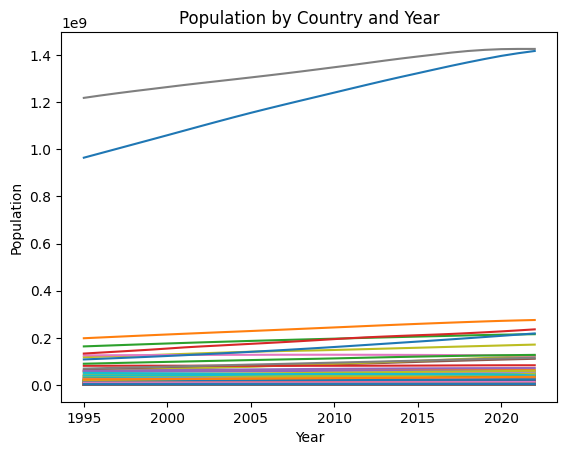

Country    Albania     Algeria  Andorra   Argentina   Australia    Austria  \
Year                                                                         
1995     3284370.0  28478024.0  62944.0  34946116.0  18003002.0  7947293.0   
1996     3271336.0  28984640.0  64166.0  35389360.0  18211850.0  7958043.0   
1997     3253721.0  29476030.0  64702.0  35815968.0  18410254.0  7967086.0   
1998     3232185.0  29924664.0  65204.0  36233196.0  18601666.0  7975856.0   
1999     3208265.0  30346086.0  65675.0  36653032.0  18800892.0  7991382.0   
2000     3182027.0  30774624.0  66116.0  37070772.0  19017968.0  8010425.0   
2001     3153615.0  31200984.0  67841.0  37480492.0  19248146.0  8039633.0   
2002     3123554.0  31624700.0  70868.0  37885024.0  19475842.0  8078994.0   
2003     3092993.0  32055882.0  73929.0  38278164.0  19699004.0  8120105.0   
2004     3062629.0  32510184.0  76950.0  38668796.0  19925060.0  8171215.0   
2005     3032636.0  32956690.0  79845.0  39070504.0  20171732.0  8227034.0   
2006     3003391.0  33435082.0  80241.0  39476856.0  20467032.0  8267771.0   
2007     2976089.0  33983836.0  78187.0  39876116.0  20830832.0  8294720.0   
2008     2951690.0  34569592.0  76073.0  40273768.0  21247876.0  8321134.0   
2009     2930553.0  35196040.0  73879.0  40684344.0  21660898.0  8342939.0   
2010     2913402.0  35856348.0  71542.0  41100124.0  22019166.0  8362829.0   
2011     2900660.0  36543548.0  70587.0  41520736.0  22357032.0  8391201.0   
2012     2892191.0  37260568.0  71035.0  41952364.0  22729272.0  8429641.0   
2013     2887019.0  38000628.0  71385.0  42388268.0  23111788.0  8479542.0   
2014     2884100.0  38760168.0  71644.0  42824064.0  23469578.0  8546066.0   
2015     2882482.0  39543148.0  71766.0  43257064.0  23820240.0  8642422.0   
2016     2881064.0  40339328.0  72563.0  43668236.0  24195706.0  8736491.0   
2017     2879361.0  41136548.0  73853.0  44054616.0  24590336.0  8797497.0   
2018     2877019.0  41927008.0  75034.0  44413592.0  24979228.0  8840518.0   
2019     2873883.0  42705372.0  76361.0  44745516.0  25357168.0  8879939.0   
2020     2866850.0  43451668.0  77723.0  45036032.0  25670052.0  8907780.0   
2021     2854710.0  44177964.0  79057.0  45276788.0  25921094.0  8922086.0   
2022     2842318.0  44903228.0  79843.0  45510324.0  26177410.0  8939617.0   

Country   Bahamas    Bahrain   Bangladesh     Belgium  ...  Switzerland  \
Year                                                   ...                
1995     299567.0   612941.0  117793336.0  10095204.0  ...    7038302.0   
1996     304944.0   632763.0  119876872.0  10123230.0  ...    7069694.0   
1997     310183.0   652651.0  122039232.0  10154876.0  ...    7086993.0   
1998     315410.0   672484.0  124350472.0  10188541.0  ...    7108225.0   
1999     320282.0   692138.0  126754824.0  10224223.0  ...    7142199.0   
2000     325033.0   711446.0  129193336.0  10264351.0  ...    7182052.0   
2001     329639.0   730263.0  131670488.0  10309249.0  ...    7224413.0   
2002     334015.0   748332.0  134139824.0  10355569.0  ...    7276479.0   
2003     338505.0   778260.0  136503216.0  10402550.0  ...    7330729.0   
2004     343097.0   833454.0  138789728.0  10456164.0  ...    7381153.0   
2005     347815.0   901928.0  140912592.0  10516979.0  ...    7428437.0   
2006     352672.0   970986.0  142628832.0  10582970.0  ...    7475014.0   
2007     357678.0  1040545.0  144135936.0  10653698.0  ...    7541909.0   
2008     362807.0  1110352.0  145421328.0  10726720.0  ...    7638288.0   
2009     368064.0  1179460.0  146706816.0  10801357.0  ...    7734402.0   
2010     373277.0  1213655.0  148391136.0  10877948.0  ...    7822444.0   
2011     377956.0  1212086.0  150211008.0  10955742.0  ...    7910988.0   
2012     382073.0  1224948.0  152090656.0  11031140.0  ...    7995738.0   
2013     385660.0  1261683.0  154030144.0  11103260.0  ...    8088370.0   
2014     389137.0  1311142.0  155961312.0  11176727.0  ...    8187792.0   
2015     

In [9]:
# Check how many unique years there are, were only looking for data after 1990 (hdi dataset low range)
# NEW I limited the begenning of the data to 1995 to get the ammount of NaN down.
# latest year is 2022 so we het first 2022 - 1995 = 27 entries + 1 = 28
display( datasets['gasses'][ 'year' ].value_counts( ).reset_index( ).sort_values( by='year', ascending=False ).head( 28 ).T )

# 259 countries have 1990-2021 data
# 247 countries have 2022 year data aswell
# lets only use the countries that have data up to 2022

# Fill NaN's with 0
datasets['gasses'] = datasets['gasses'].fillna( 0 )

# Visualise the population growth by year for each country, starting from the year 1990 and where there is data until 2022
filtered_gasses = datasets['gasses'][ ( datasets['gasses'][ 'year' ] <= 2022 ) ]
grouped = filtered_gasses.groupby([ 'country', 'year' ])

data = [ ]
for name, group in grouped:
    country, year = name
    population = group[ 'population' ].mean( )
    data.append(( year, country, population ))

populations = pd.DataFrame( data, columns=[ 'Year', 'Country', 'Population' ]).pivot( index='Year', columns='Country', values='Population' )

# Show the populations
populations.plot( kind='line' )
plt.title( 'Population by Country and Year' )
plt.xlabel( 'Year' )
plt.ylabel( 'Population' )
plt.legend( ).remove( ) # too big, only want to see generalized data
plt.show()

populations

Generated historical data for gdp, access the dataframe with `gasses_yearly_data["gdp"]`
Generated historical data for cement_co2, access the dataframe with `gasses_yearly_data["cement_co2"]`
Generated historical data for cement_co2_per_capita, access the dataframe with `gasses_yearly_data["cement_co2_per_capita"]`
Generated historical data for co2, access the dataframe with `gasses_yearly_data["co2"]`
Generated historical data for co2_including_luc, access the dataframe with `gasses_yearly_data["co2_including_luc"]`
Generated historical data for co2_including_luc_growth_abs, access the dataframe with `gasses_yearly_data["co2_including_luc_growth_abs"]`
Generated historical data for co2_including_luc_growth_prct, access the dataframe with `gasses_yearly_data["co2_including_luc_growth_prct"]`
Generated historical data for co2_including_luc_per_capita, access the dataframe with `gasses_yearly_data["co2_including_luc_per_capita"]`
Generated historical data for co2_including_luc_per_gdp, a

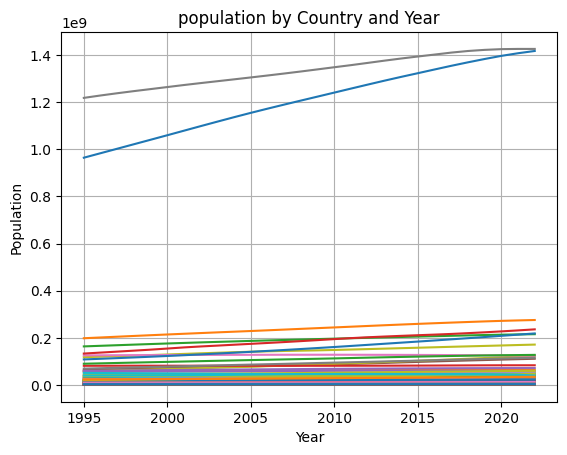

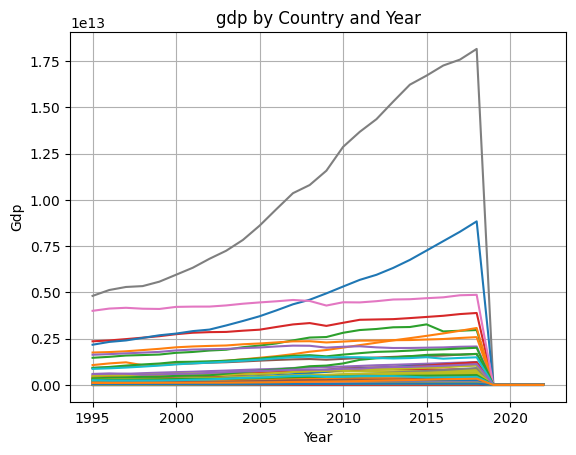

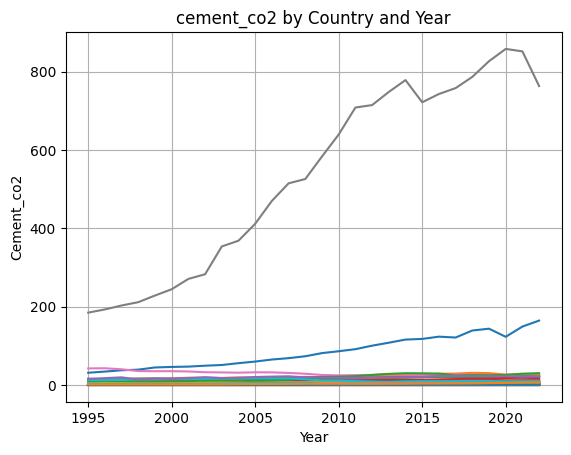

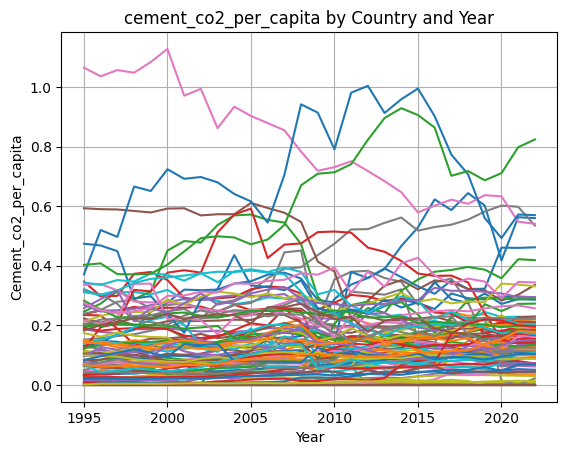

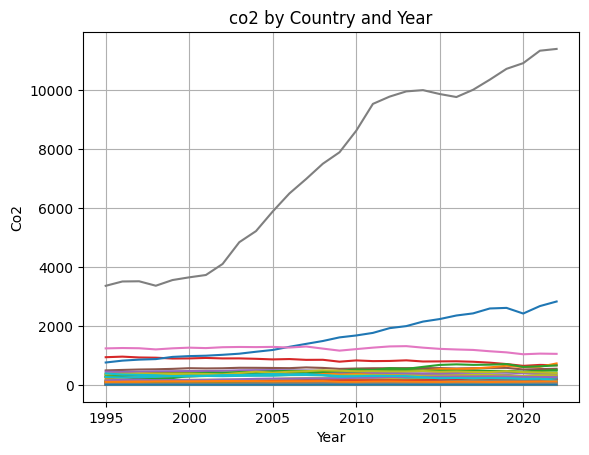

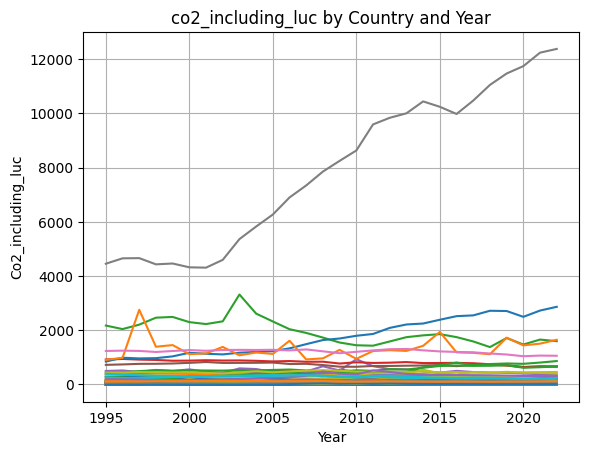

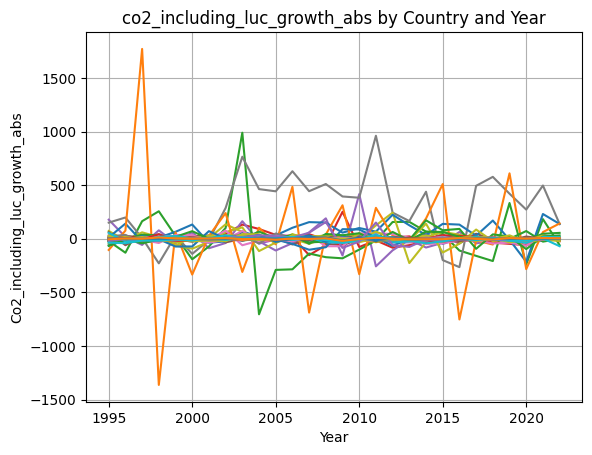

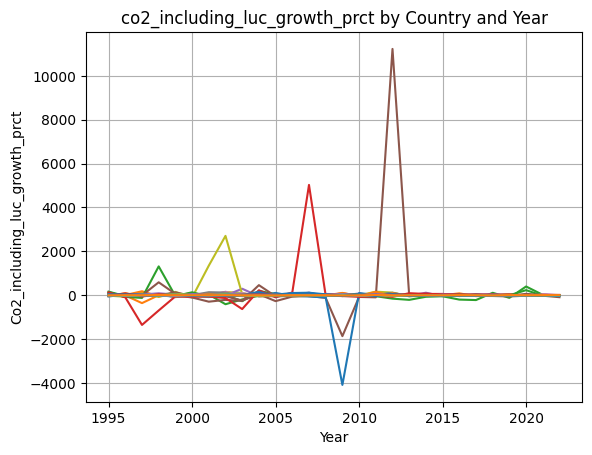

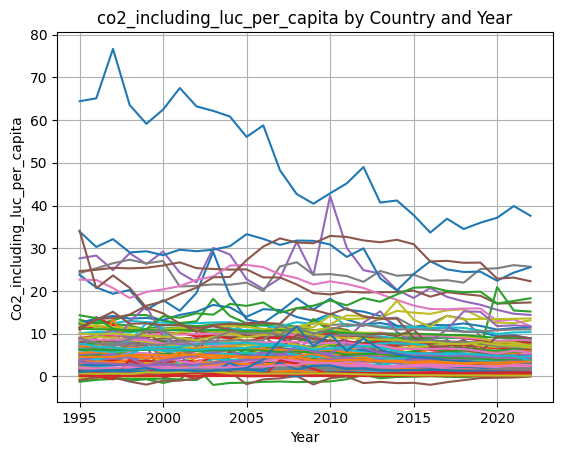

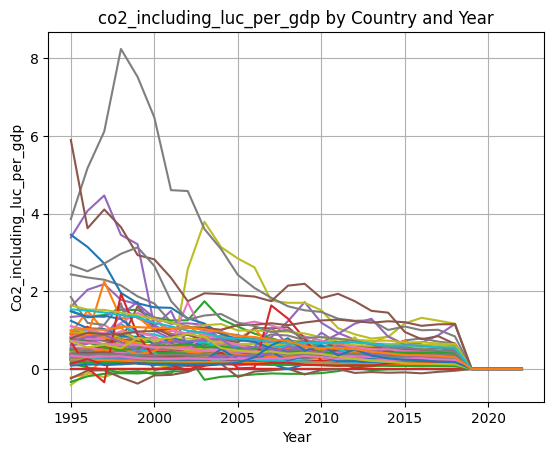

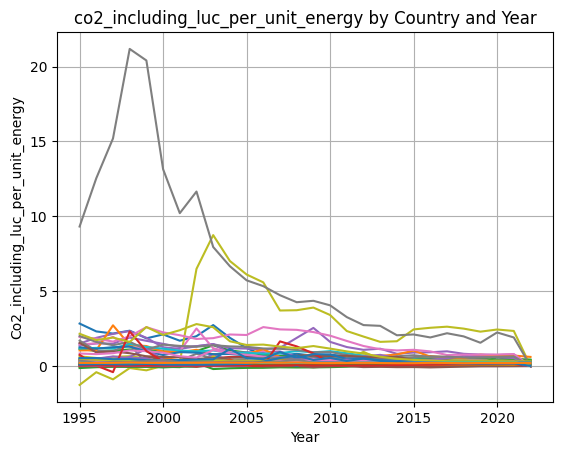

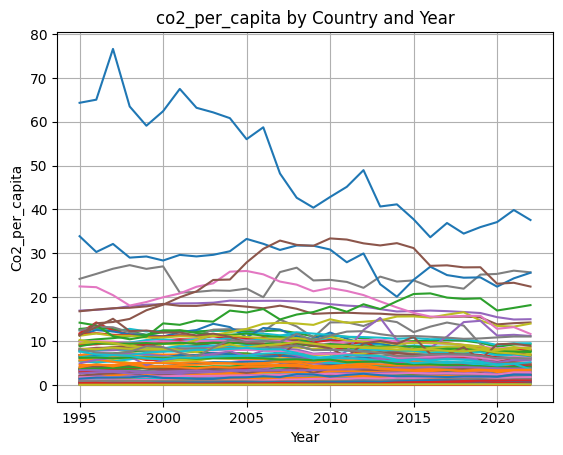

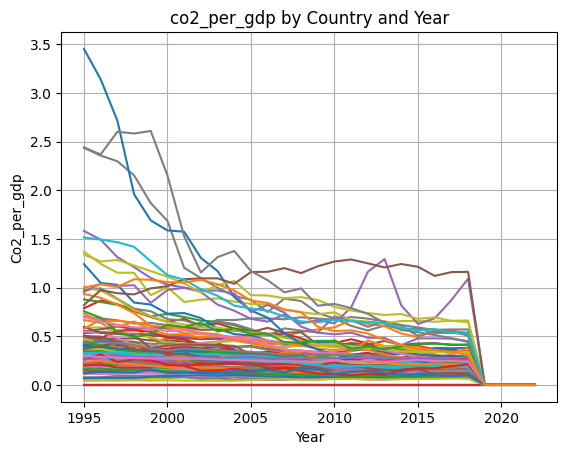

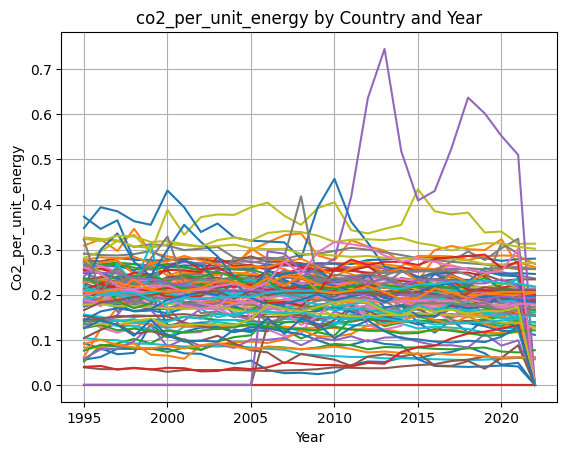

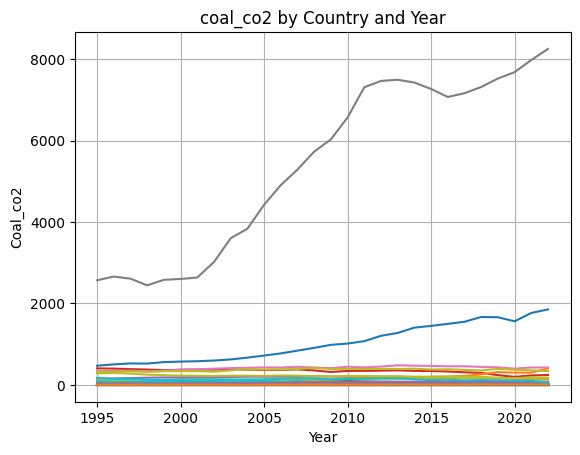

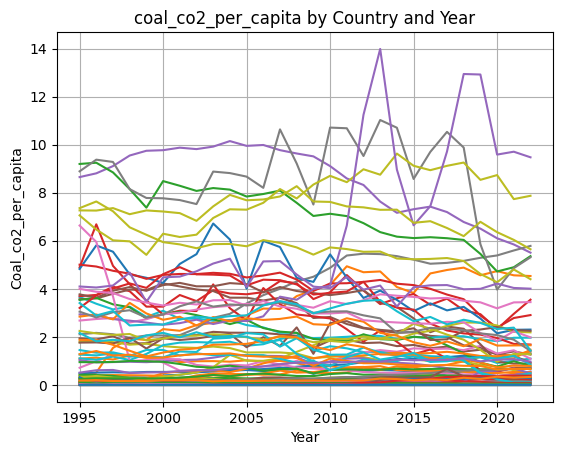

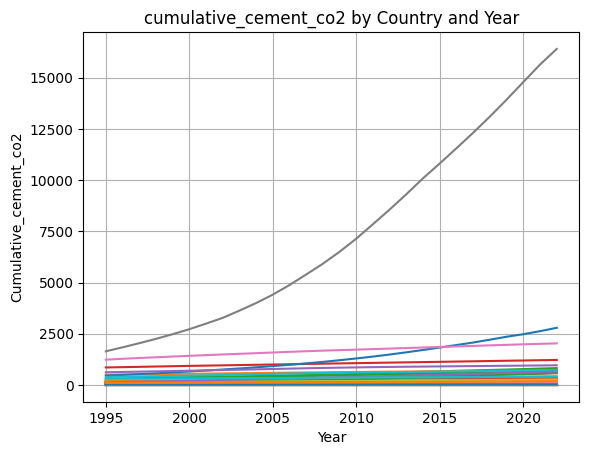

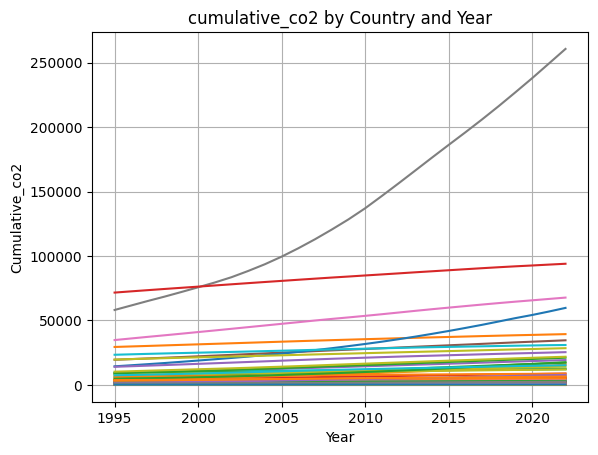

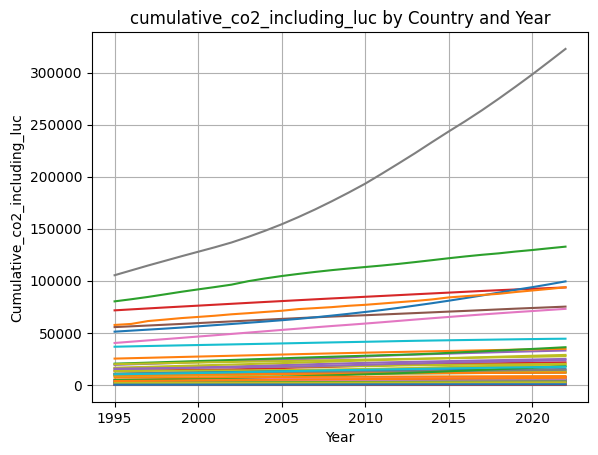

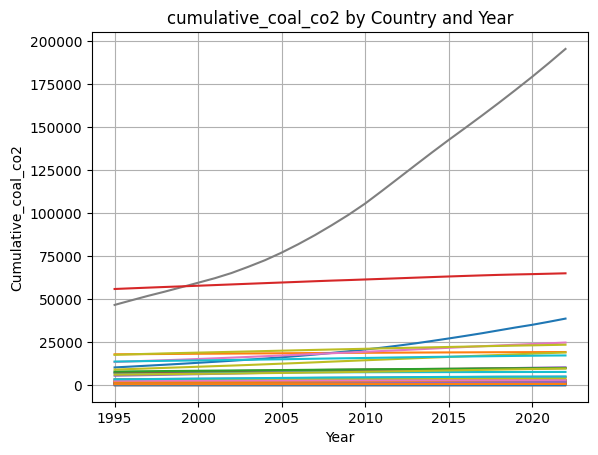

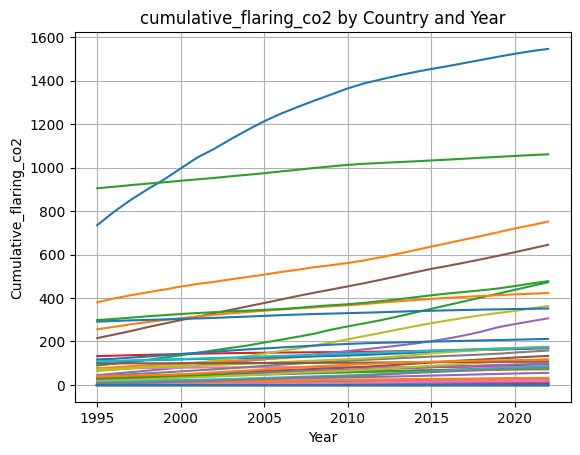

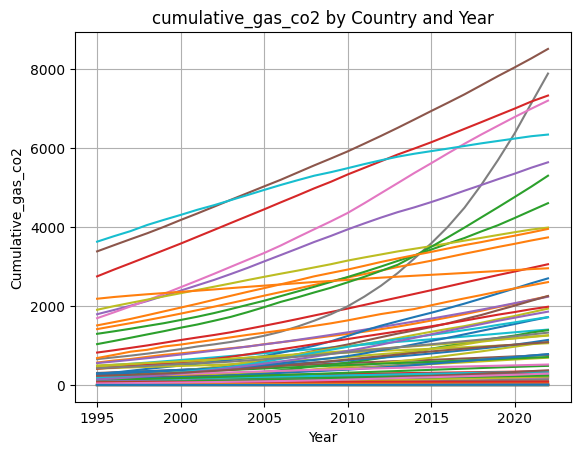

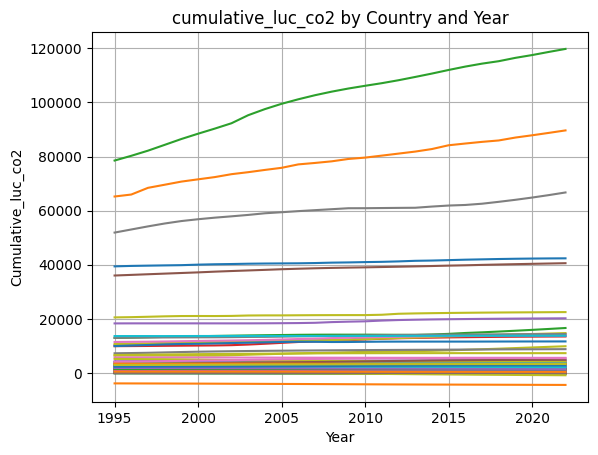

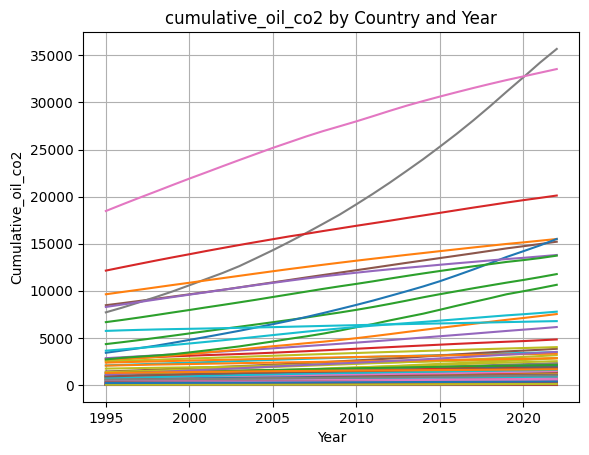

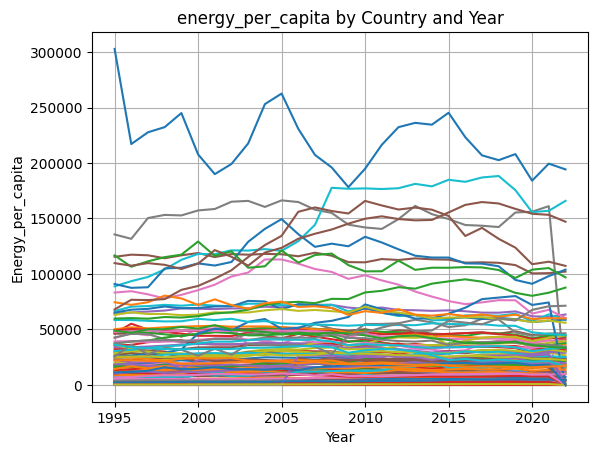

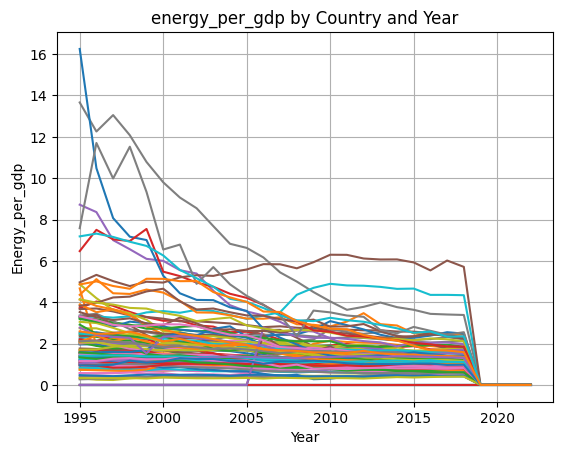

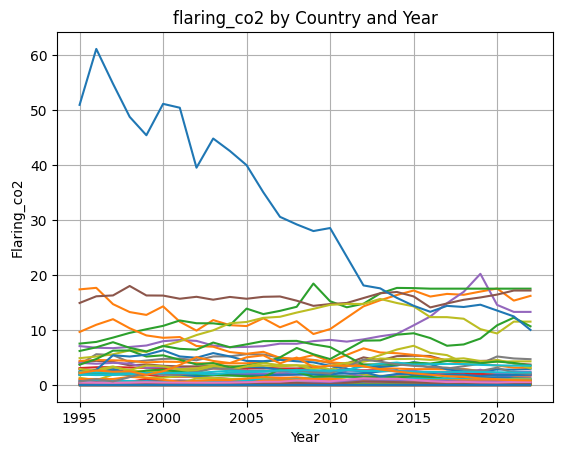

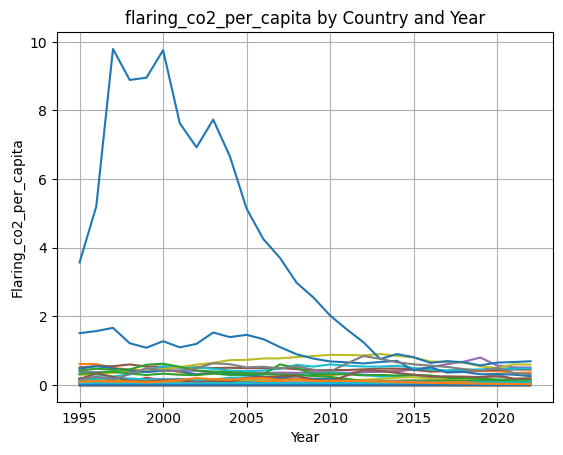

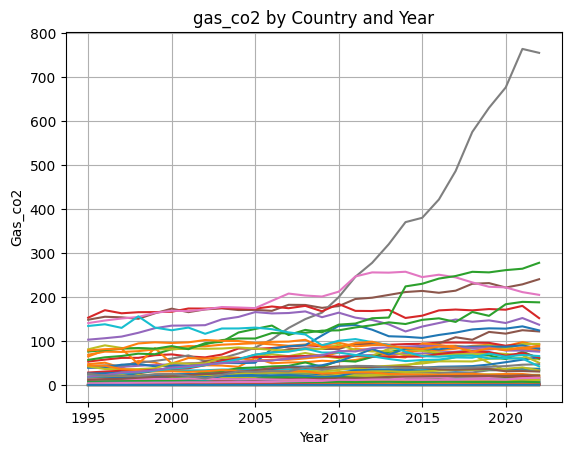

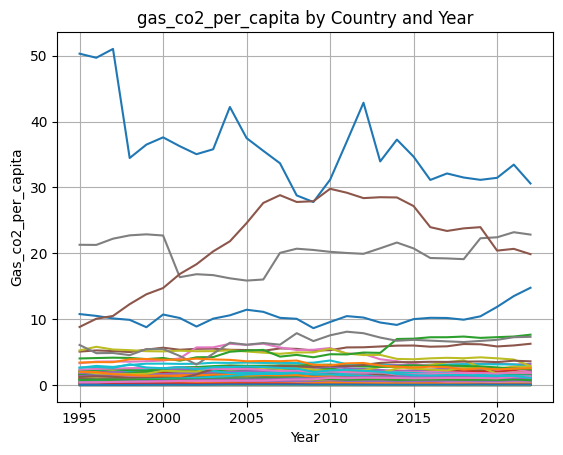

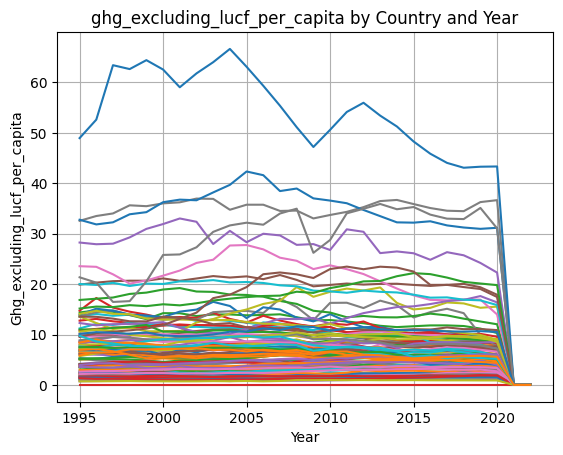

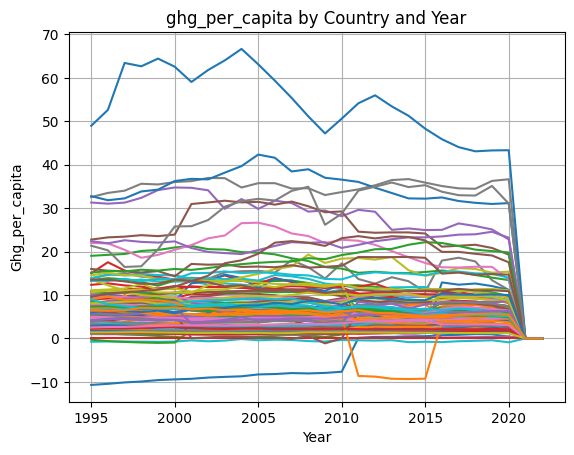

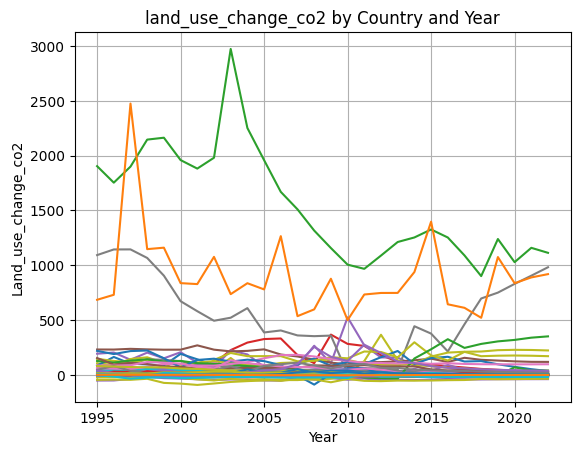

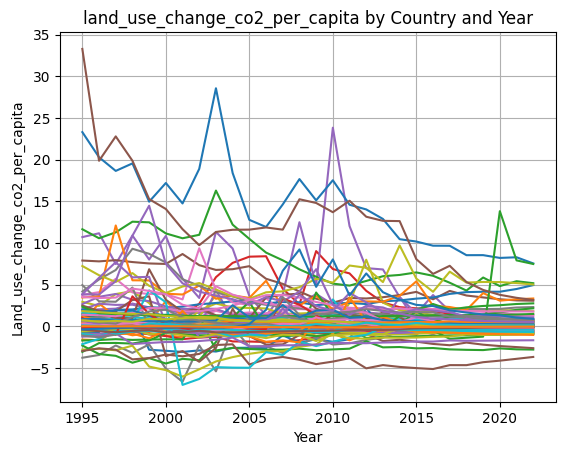

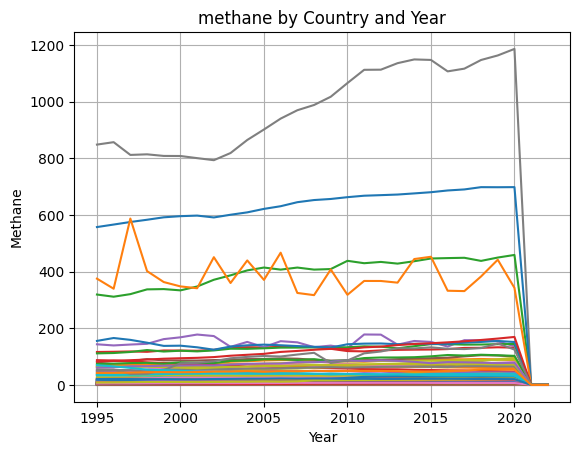

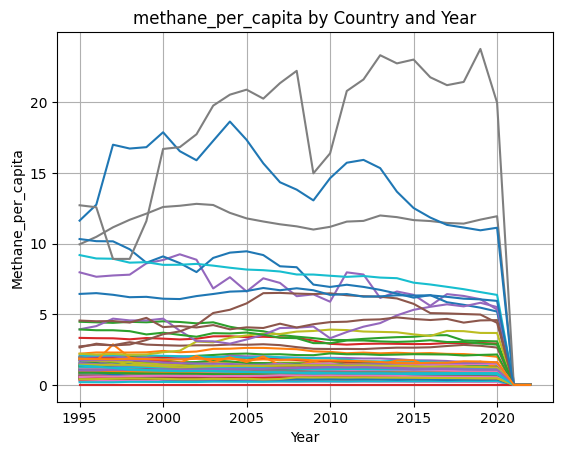

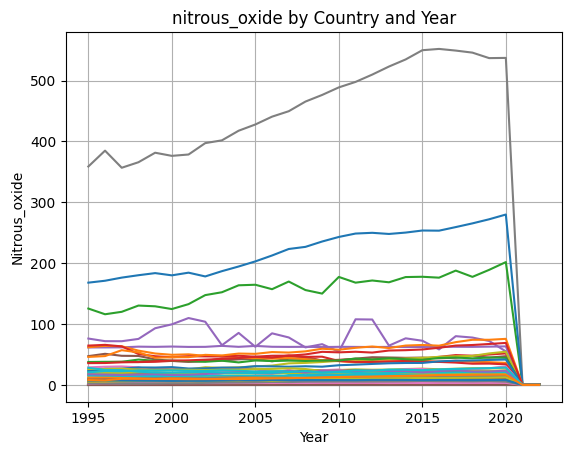

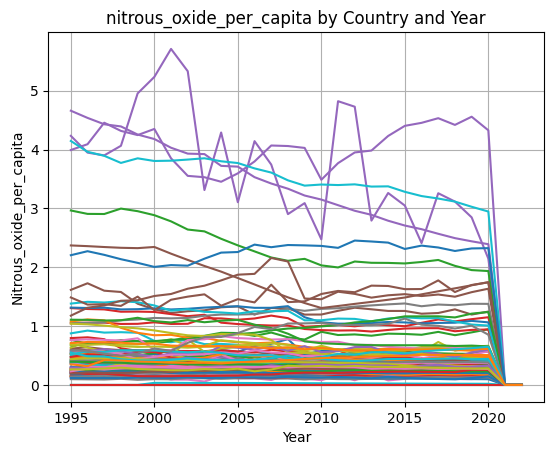

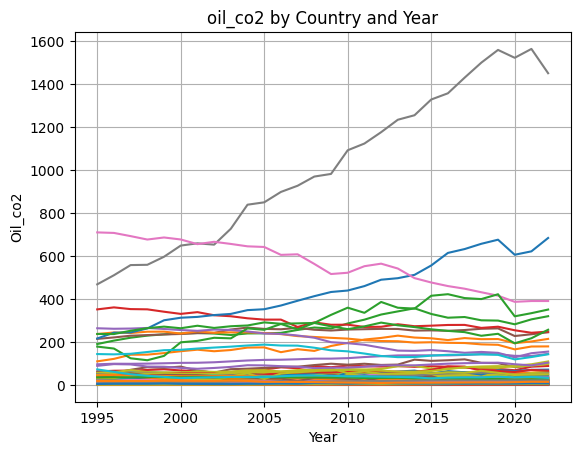

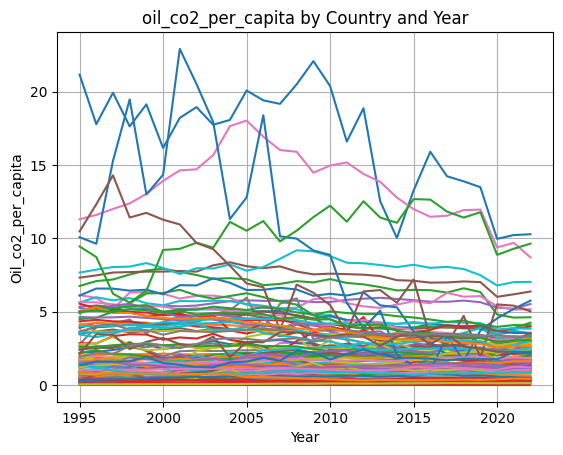

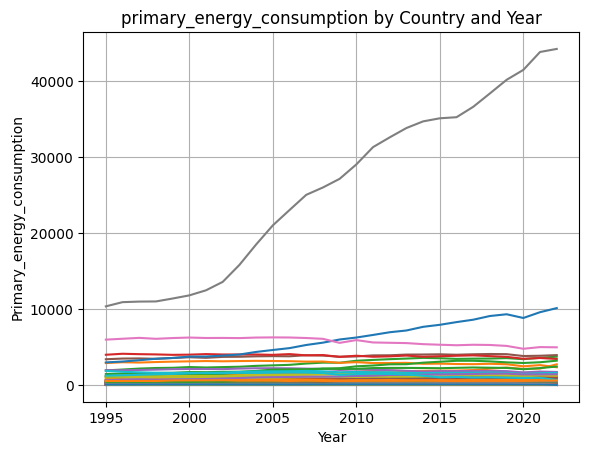

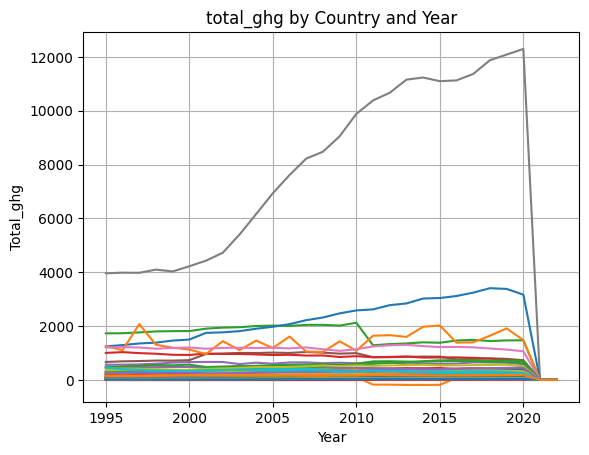

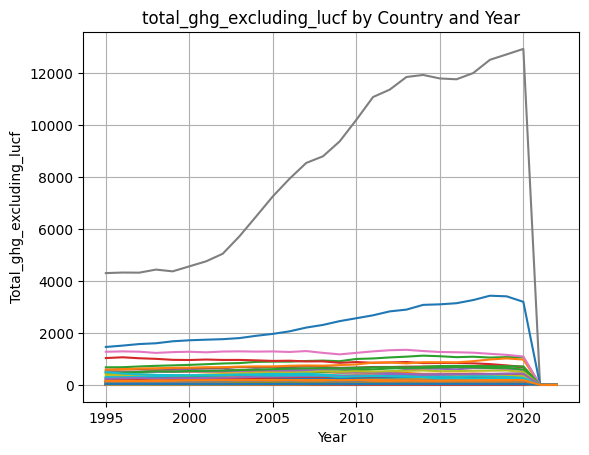

In [10]:
# Do the same for co2 stats and gdp
# ['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
#        'cement_co2_per_capita', 'co2', 'co2_including_luc',
#        'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct',
#        'co2_including_luc_per_capita', 'co2_including_luc_per_gdp',
#        'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp',
#        'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita',
#        'consumption_co2', 'consumption_co2_per_capita',
#        'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
#        'cumulative_co2_including_luc', 'cumulative_coal_co2',
#        'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
#        'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
#        'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
#        'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
#        'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane',
#        'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
#        'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita',
#        'other_industry_co2', 'primary_energy_consumption', 'total_ghg',
#        'total_ghg_excluding_lucf', 'trade_co2', 'trade_co2_share']
# All indexes of the gasses dataframe

def create_dataframe( column_to_track : str ) -> pd.DataFrame:
    grouped = filtered_gasses.groupby([ 'country', 'year' ])

    data = [ ]
    for name, group in grouped:
        country, year = name
        coldata = group[ column_to_track ].mean( )
        data.append(( year, country, coldata ))

    return pd.DataFrame( data, columns=[ 'Year', 'Country', column_to_track ]).pivot( index='Year', columns='Country', values=column_to_track )

def graph_gasses_dataframe( df : pd.DataFrame, name : str ):
    df.plot( kind='line' )
    plt.title( f'{ name } by Country and Year' )
    plt.xlabel( 'Year' )
    plt.ylabel( name.capitalize( ) )
    plt.legend( ).remove( )
    plt.grid(True)
    plt.show( )

gasses_yearly_data = {
    'population' : populations
}

# Population is index 2, so we want to start from gdp
for colname in datasets['gasses'].columns[ 3: ]:
    gasses_yearly_data[ colname ] = create_dataframe( colname )
    print( f'Generated historical data for { colname }, access the dataframe with `gasses_yearly_data["{ colname }"]`' )

for name, df in gasses_yearly_data.items( ):
    graph_gasses_dataframe( df, name )


# Making the data useable

Some spikes in gdp, co2_per_capita, co2_per_gdp, oil_co2_per_capita

Features spiking interest or I think are useable: population, gdp, cement_co2, cement_co2_per_capita, co2, co2_including_luc (land-use change?), co2_per_capita, co2_per_gdp, coal_co2, energy_per_capita, energy_per_gdp (0 starting from 2018), gas_co2, gas_co2_per_capita, oil_co2, oil_co2_per_capita, other_co2_per_capita, primary_energy_consumption

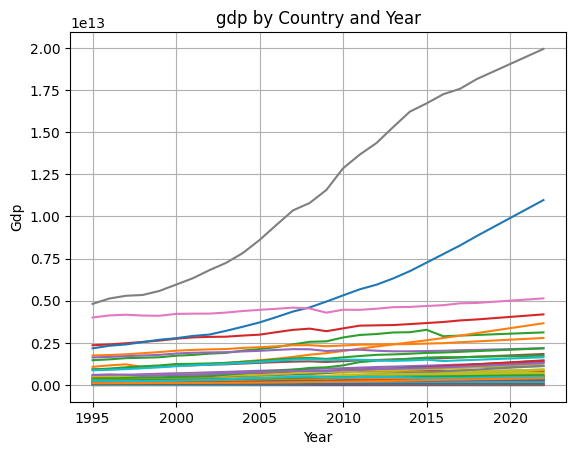

In [11]:
# issue: gdp is 0 for 95 countries
# print( gasses_yearly_data[ 'gdp' ].describe( ).loc[ 'max' ] )
sloap = (gasses_yearly_data["gdp"].loc[2018] - gasses_yearly_data["gdp"].loc[2016]) / 2 # the trends look linear enaught for this to be an axceptable solution

for y in range(2018, 2022):
  gasses_yearly_data["gdp"].loc[y+1] = gasses_yearly_data["gdp"].loc[y] + sloap

graph_gasses_dataframe( gasses_yearly_data["gdp"], 'gdp' )

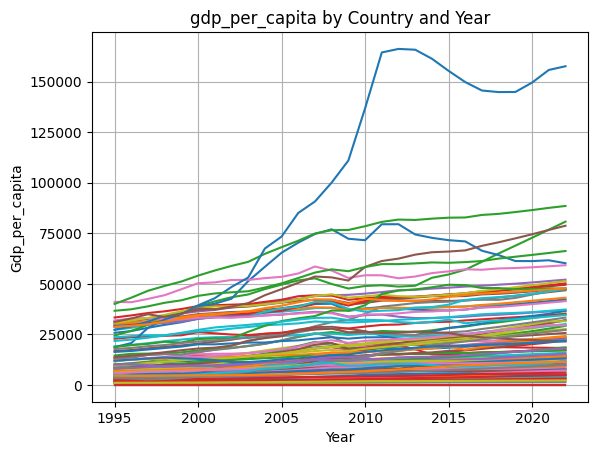

In [12]:
gasses_yearly_data["gdp_per_capita"] = (gasses_yearly_data["gdp"] / gasses_yearly_data["population"])

graph_gasses_dataframe( gasses_yearly_data["gdp_per_capita"], 'gdp_per_capita' )# I think this might be more informative than just gdp

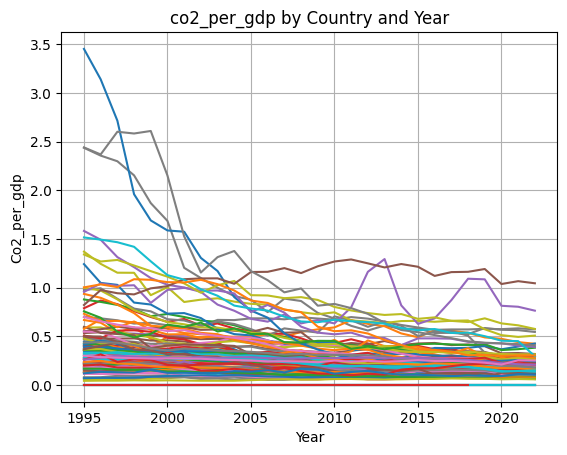

In [13]:
gasses_yearly_data["co2_per_gdp"].loc[2019:2022] = (gasses_yearly_data["co2"].loc[2019:2022] / gasses_yearly_data["gdp"].loc[2019:2022])*1000000000
gasses_yearly_data["co2_per_gdp"].replace([np.inf, -np.inf], 0, inplace=True)

graph_gasses_dataframe( gasses_yearly_data["co2_per_gdp"], 'co2_per_gdp' )

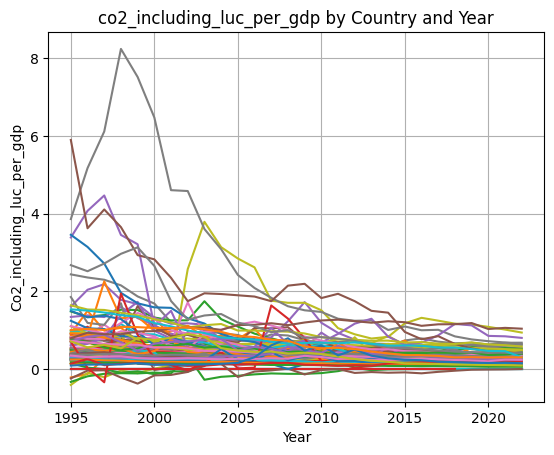

In [14]:
gasses_yearly_data["co2_including_luc_per_gdp"].loc[2019:2022] = (gasses_yearly_data["co2_including_luc"].loc[2019:2022] / gasses_yearly_data["gdp"].loc[2019:2022])*1000000000
gasses_yearly_data["co2_including_luc_per_gdp"].replace([np.inf, -np.inf], 0, inplace=True)

graph_gasses_dataframe( gasses_yearly_data["co2_including_luc_per_gdp"], 'co2_including_luc_per_gdp' )

In [15]:
interesting_features = [ 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_including_luc', 'co2_per_capita', 'co2_per_gdp', 'coal_co2', 'energy_per_capita', 'energy_per_gdp', 'gas_co2', 'gas_co2_per_capita', 'oil_co2', 'oil_co2_per_capita', 'primary_energy_consumption' ]

data = { }

first_feature = interesting_features[ 0 ]

base_dataset = gasses_yearly_data[ first_feature ]

keys_data = base_dataset.index
keys_for_each_year = base_dataset.columns

first_year = keys_data[ 0 ]

for year in keys_data:
    rotated = base_dataset.loc[ year ].transpose( )

    second_feature = interesting_features[ 1 ]
    year_data = gasses_yearly_data[ second_feature ].loc[ year ].transpose( )

    new_data = pd.merge( rotated, year_data, left_index=True, right_index=True )
    new_data.columns = ( 'population', 'gdp' )

    data[ year ] = new_data

for year in keys_data:
    new_data = data[ year ]
    for i in range( 2, len( interesting_features ) ):
        feature_name = interesting_features[ i ]
        new_data = pd.merge( new_data, gasses_yearly_data[ feature_name ].loc[ year ].transpose( ), left_index=True, right_index=True )
        new_data.rename( columns={ new_data.columns[ -1 ] : feature_name }, inplace=True )

    data[ year ] = new_data
    display( year, data[ year ], list( data[ year ].columns ) )


# data is grouped by years, access by data[ year ],
# indexed by country with each column being a feature

1995

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        3284370.0  1.160073e+10       0.103                  0.031   
Algeria       28478024.0  1.450547e+11       3.165                  0.111   
Andorra          62944.0  0.000000e+00       0.000                  0.000   
Argentina     34946116.0  4.616010e+11       2.621                  0.075   
Australia     18003002.0  5.491729e+11       3.358                  0.187   
...                  ...           ...         ...                    ...   
Turkmenistan   4226625.0  1.416641e+10       0.177                  0.042   
Uganda        20680834.0  2.181114e+10       0.028                  0.001   
Ukraine       51061268.0  2.574780e+11       3.408                  0.067   
Uruguay        3208305.0  3.839953e+10       0.270                  0.084   
Uzbekistan    23026212.0  1.046157e+11       1.545                  0.067   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         2.089              2.581           0.636        0.180   
Algeria        96.777            108.142           3.398        0.667   
Andorra         0.425              0.473           6.752        0.000   
Argentina     125.240            164.034           3.584        0.271   
Australia     305.056            497.653          16.945        0.555   
...               ...                ...             ...          ...   
Turkmenistan   34.569             37.885           8.179        2.440   
Uganda          0.925             15.475           0.045        0.042   
Ukraine       390.072            395.485           7.639        1.515   
Uruguay         4.557              3.331           1.420        0.119   
Uzbekistan    104.803            105.017           4.551        1.002   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.161           6919.917           1.959    0.051   
Algeria          1.935          10996.016           2.159   47.222   
Andorra          0.000              0.000           0.000    0.000   
Argentina        3.701          17977.289           1.361   53.195   
Australia      155.735          64117.020           2.102   39.847   
...                ...                ...             ...      ...   
Turkmenistan     0.000          25405.623           7.580   25.645   
Uganda           0.000            347.494           0.329    0.000   
Ukraine        174.093          36226.188           7.184  134.048   
Uruguay          0.000          11284.824           0.943    0.000   
Uzbekistan       4.210          22078.691           4.860   78.285   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.016    1.773               0.540   
Algeria                    1.658   27.081               0.951   
Andorra                    0.000    0.425               6.752   
Argentina                  1.522   62.836               1.798   
Australia                  2.213   96.068               5.336   
...                          ...      ...                 ...   
Turkmenistan               6.068    8.111               1.919   
Uganda                     0.000    0.898               0.043   
Ukraine                    2.625   72.310               1.416   
Uruguay                    0.000    4.287               1.336   
Uzbekistan                 3.400   18.624               0.809   

              primary_energy_consumption  
Country                                   
Albania                           22.728  
Algeria                          313.145  
Andorra                            0.000  
Argentina                        628.236  
Australia                       1154.299  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

1996

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        3271336.0  1.272738e+10       0.105                  0.032   
Algeria       28984640.0  1.565791e+11       3.006                  0.104   
Andorra          64166.0  0.000000e+00       0.000                  0.000   
Argentina     35389360.0  4.894065e+11       2.422                  0.068   
Australia     18211850.0  5.745514e+11       3.244                  0.178   
...                  ...           ...         ...                    ...   
Turkmenistan   4301092.0  1.336664e+10       0.183                  0.042   
Uganda        21249570.0  2.321644e+10       0.080                  0.004   
Ukraine       50616104.0  2.356027e+11       2.161                  0.043   
Uruguay        3226635.0  4.038166e+10       0.308                  0.096   
Uzbekistan    23465930.0  1.047482e+11       1.433                  0.061   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         2.018              2.318           0.617        0.159   
Algeria       100.039            108.206           3.451        0.639   
Andorra         0.454              0.491           7.081        0.000   
Argentina     131.135            170.991           3.705        0.268   
Australia     311.940            515.151          17.128        0.543   
...               ...                ...             ...          ...   
Turkmenistan   31.654             33.650           7.360        2.368   
Uganda          1.018             12.961           0.048        0.044   
Ukraine       351.770            354.168           6.950        1.493   
Uruguay         5.405              4.495           1.675        0.134   
Uzbekistan    108.184            108.126           4.610        1.033   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.114           7645.640           1.965    0.044   
Algeria          1.407          10692.724           1.979   50.567   
Andorra          0.000              0.000           0.000    0.000   
Argentina        3.100          18568.533           1.343   57.542   
Australia      160.388          65239.766           2.068   39.781   
...                ...                ...             ...      ...   
Turkmenistan     0.264          36365.113          11.701   20.738   
Uganda           0.000            352.338           0.322    0.000   
Ukraine        146.215          34061.734           7.318  137.899   
Uruguay          0.004          11730.400           0.937    0.000   
Uzbekistan       4.723          22350.256           5.007   81.254   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.013    1.755               0.536   
Algeria                    1.745   27.407               0.946   
Andorra                    0.000    0.454               7.081   
Argentina                  1.626   65.921               1.863   
Australia                  2.184   98.664               5.418   
...                          ...      ...                 ...   
Turkmenistan               4.822    9.420               2.190   
Uganda                     0.000    0.938               0.044   
Ukraine                    2.724   60.779               1.201   
Uruguay                    0.000    5.093               1.578   
Uzbekistan                 3.463   18.136               0.773   

              primary_energy_consumption  
Country                                   
Albania                           25.011  
Algeria                          309.925  
Andorra                            0.000  
Argentina                        657.128  
Australia                       1188.137  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

1997

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        3253721.0  1.139651e+10       0.052                  0.016   
Algeria       29476030.0  1.646445e+11       3.271                  0.111   
Andorra          64702.0  0.000000e+00       0.000                  0.000   
Argentina     35815968.0  5.315264e+11       3.169                  0.088   
Australia     18410254.0  6.006211e+11       3.185                  0.173   
...                  ...           ...         ...                    ...   
Turkmenistan   4363678.0  1.199606e+10       0.182                  0.042   
Uganda        21876938.0  2.428312e+10       0.091                  0.004   
Ukraine       50169352.0  2.323333e+11       2.415                  0.048   
Uruguay        3245066.0  4.241177e+10       0.351                  0.108   
Uzbekistan    23877290.0  1.084868e+11       1.502                  0.063   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         1.543              1.788           0.474        0.135   
Algeria        88.369             94.903           2.998        0.537   
Andorra         0.465              0.501           7.192        0.000   
Argentina     136.524            180.669           3.812        0.257   
Australia     320.333            457.837          17.400        0.533   
...               ...                ...             ...          ...   
Turkmenistan   31.196             32.575           7.149        2.601   
Uganda          1.062             15.124           0.049        0.044   
Ukraine       340.514            337.774           6.787        1.466   
Uruguay         5.514              4.876           1.699        0.130   
Uzbekistan    109.028            108.789           4.566        1.005   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.044           7020.859           2.004    0.037   
Algeria          1.381          10105.151           1.809   39.007   
Andorra          0.000              0.000           0.000    0.000   
Argentina        2.777          18560.301           1.251   61.504   
Australia      167.683          66120.109           2.027   41.090   
...                ...                ...             ...      ...   
Turkmenistan     0.000          27446.891           9.984   21.166   
Uganda           0.000            363.639           0.328    0.000   
Ukraine        154.305          33145.512           7.157  129.719   
Uruguay          0.004          12754.899           0.976    0.000   
Uzbekistan       3.884          21735.543           4.784   82.506   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.011    1.411               0.434   
Algeria                    1.323   30.019               1.018   
Andorra                    0.000    0.465               7.192   
Argentina                  1.717   66.868               1.867   
Australia                  2.232   98.381               5.344   
...                          ...      ...                 ...   
Turkmenistan               4.850    9.209               2.110   
Uganda                     0.000    0.971               0.044   
Ukraine                    2.586   49.468               0.986   
Uruguay                    0.000    5.159               1.590   
Uzbekistan                 3.455   18.738               0.785   

              primary_energy_consumption  
Country                                   
Albania                           22.844  
Algeria                          297.860  
Andorra                            0.000  
Argentina                        664.755  
Australia                       1217.288  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

1998

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        3232185.0  1.246671e+10       0.044                  0.013   
Algeria       29924664.0  1.799629e+11       3.446                  0.115   
Andorra          65204.0  0.000000e+00       0.000                  0.000   
Argentina     36233196.0  5.545670e+11       3.283                  0.091   
Australia     18601666.0  6.343051e+11       3.475                  0.187   
...                  ...           ...         ...                    ...   
Turkmenistan   4431523.0  1.294586e+10       0.182                  0.041   
Uganda        22537658.0  2.573538e+10       0.099                  0.004   
Ukraine       49745868.0  2.317373e+11       2.788                  0.056   
Uruguay        3262676.0  4.428010e+10       0.392                  0.120   
Uzbekistan    24256774.0  1.113894e+11       1.592                  0.066   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         1.755              2.002           0.543        0.141   
Algeria       106.537            111.606           3.560        0.592   
Andorra         0.491              0.522           7.530        0.000   
Argentina     139.005            190.348           3.836        0.251   
Australia     334.136            536.629          17.963        0.527   
...               ...                ...             ...          ...   
Turkmenistan   33.446             38.397           7.547        2.583   
Uganda          1.209             13.681           0.054        0.047   
Ukraine       328.808            321.052           6.610        1.419   
Uruguay         5.639              5.164           1.728        0.127   
Uzbekistan    120.975            120.758           4.987        1.086   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.055           7602.231           1.971    0.033   
Algeria          2.110          10304.176           1.713   54.641   
Andorra          0.000              0.000           0.000    0.000   
Argentina        2.840          18999.846           1.241   61.614   
Australia      177.614          67001.016           1.965   43.506   
...                ...                ...             ...      ...   
Turkmenistan     0.000          33653.324          11.520   20.035   
Uganda           0.000            377.727           0.331    0.000   
Ukraine        123.079          32257.029           6.924  155.921   
Uruguay          0.004          15881.316           1.170    0.004   
Uzbekistan       4.056          21355.254           4.650   94.358   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.010    1.623               0.502   
Algeria                    1.826   33.090               1.106   
Andorra                    0.000    0.491               7.530   
Argentina                  1.700   69.576               1.920   
Australia                  2.339   99.142               5.330   
...                          ...      ...                 ...   
Turkmenistan               4.521   11.809               2.665   
Uganda                     0.000    1.110               0.049   
Ukraine                    3.134   42.553               0.855   
Uruguay                    0.001    5.240               1.606   
Uzbekistan                 3.890   18.493               0.762   

              primary_energy_consumption  
Country                                   
Albania                           24.572  
Algeria                          308.349  
Andorra                            0.000  
Argentina                        688.425  
Australia                       1246.331  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

1999

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        3208265.0  1.415186e+10       0.055                  0.017   
Algeria       30346086.0  1.931798e+11       3.435                  0.113   
Andorra          65675.0  0.000000e+00       0.000                  0.000   
Argentina     36653032.0  5.382706e+11       3.290                  0.090   
Australia     18800892.0  6.642068e+11       3.520                  0.187   
...                  ...           ...         ...                    ...   
Turkmenistan   4501087.0  1.525196e+10       0.182                  0.040   
Uganda        23279246.0  2.774805e+10       0.104                  0.004   
Ukraine       49320116.0  2.351483e+11       2.535                  0.051   
Uruguay        3278965.0  4.316754e+10       0.354                  0.108   
Uzbekistan    24602712.0  1.143834e+11       1.498                  0.061   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         2.986              2.956           0.931        0.211   
Algeria        91.449             94.670           3.014        0.473   
Andorra         0.513              0.541           7.811        0.000   
Argentina     147.674            195.429           4.029        0.274   
Australia     343.959            494.546          18.295        0.518   
...               ...                ...             ...          ...   
Turkmenistan   39.797             47.787           8.842        2.609   
Uganda          1.255             22.211           0.054        0.045   
Ukraine       298.579            315.569           6.054        1.270   
Uruguay         6.682              6.479           2.038        0.155   
Uzbekistan    123.587            123.351           5.023        1.080   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.110           6892.834           1.563    0.029   
Algeria          2.173          10262.746           1.612   50.920   
Andorra          0.000              0.000           0.000    0.000   
Argentina        2.154          18990.684           1.293   67.621   
Australia      183.231          69004.570           1.953   45.564   
...                ...                ...             ...      ...   
Turkmenistan     0.000          31627.238           9.334   24.518   
Uganda           0.000            366.538           0.308    0.000   
Ukraine        123.714          32047.443           6.722  130.367   
Uruguay          0.004          14172.597           1.077    0.040   
Uzbekistan       4.027          23867.217           5.134   96.935   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.009    2.792               0.870   
Algeria                    1.678   22.188               0.731   
Andorra                    0.000    0.513               7.811   
Argentina                  1.845   72.725               1.984   
Australia                  2.424  100.809               5.362   
...                          ...      ...                 ...   
Turkmenistan               5.447   12.906               2.867   
Uganda                     0.000    1.150               0.049   
Ukraine                    2.643   37.528               0.761   
Uruguay                    0.012    6.284               1.916   
Uzbekistan                 3.940   19.280               0.784   

              primary_energy_consumption  
Country                                   
Albania                           22.114  
Algeria                          311.434  
Andorra                            0.000  
Argentina                        696.066  
Australia                       1297.347  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2000

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        3182027.0  1.521426e+10       0.094                  0.029   
Algeria       30774624.0  2.085541e+11       3.789                  0.123   
Andorra          66116.0  0.000000e+00       0.000                  0.000   
Argentina     37070772.0  5.364810e+11       2.771                  0.075   
Australia     19017968.0  6.918866e+11       3.621                  0.190   
...                  ...           ...         ...                    ...   
Turkmenistan   4569135.0  1.829917e+10       0.181                  0.040   
Uganda        24020710.0  2.883909e+10       0.108                  0.004   
Ukraine       48879752.0  2.531961e+11       2.261                  0.046   
Uruguay        3292227.0  4.235743e+10       0.314                  0.095   
Uzbekistan    24925558.0  1.168759e+11       1.482                  0.059   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         3.025              2.860           0.951        0.199   
Algeria        85.399             90.487           2.775        0.409   
Andorra         0.524              0.550           7.925        0.000   
Argentina     142.765            189.894           3.851        0.266   
Australia     350.008            556.108          18.404        0.506   
...               ...                ...             ...          ...   
Turkmenistan   39.361             48.566           8.615        2.151   
Uganda          1.361             21.481           0.057        0.047   
Ukraine       285.674            299.244           5.844        1.128   
Uruguay         5.268              4.686           1.600        0.124   
Uzbekistan    123.477            123.256           4.954        1.056   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.070           9029.438           1.888    0.022   
Algeria          1.960           9746.524           1.438   38.534   
Andorra          0.000              0.000           0.000    0.000   
Argentina        1.656          18849.811           1.303   69.438   
Australia      185.797          68632.961           1.887   46.610   
...                ...                ...             ...      ...   
Turkmenistan     0.000          26223.863           6.548   24.948   
Uganda           0.000            430.945           0.359    0.000   
Ukraine        122.878          32435.855           6.262  124.325   
Uruguay          0.004          14601.469           1.135    0.062   
Uzbekistan       4.917          24053.547           5.130   95.364   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.007    2.840               0.892   
Algeria                    1.252   26.828               0.872   
Andorra                    0.000    0.524               7.925   
Argentina                  1.873   67.434               1.819   
Australia                  2.451  102.650               5.398   
...                          ...      ...                 ...   
Turkmenistan               5.460   12.337               2.700   
Uganda                     0.000    1.253               0.052   
Ukraine                    2.543   31.612               0.647   
Uruguay                    0.019    4.888               1.485   
Uzbekistan                 3.826   19.232               0.772   

              primary_energy_consumption  
Country                                   
Albania                           28.732  
Algeria                          299.946  
Andorra                            0.000  
Argentina                        698.777  
Australia                       1305.259  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2001

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        3153615.0  1.656384e+10       0.000                  0.000   
Algeria       31200984.0  2.234203e+11       3.766                  0.121   
Andorra          67841.0  0.000000e+00       0.000                  0.000   
Argentina     37480492.0  5.152213e+11       2.481                  0.066   
Australia     19248146.0  7.136258e+11       3.541                  0.184   
...                  ...           ...         ...                    ...   
Turkmenistan   4635100.0  2.228261e+10       0.181                  0.039   
Uganda        24763328.0  3.138727e+10       0.124                  0.005   
Ukraine       48414536.0  2.811103e+11       2.475                  0.051   
Uruguay        3300938.0  4.059816e+10       0.451                  0.137   
Uzbekistan    25248440.0  1.198900e+11       1.682                  0.067   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         3.221              2.996           1.021        0.194   
Algeria        86.839             92.433           2.783        0.389   
Andorra         0.524              0.546           7.723        0.000   
Argentina     134.422            179.750           3.586        0.261   
Australia     357.783            467.790          18.588        0.501   
...               ...                ...             ...          ...   
Turkmenistan   34.034             38.994           7.343        1.527   
Uganda          1.417             25.221           0.057        0.045   
Ukraine       303.891            308.743           6.277        1.081   
Uruguay         5.030              4.762           1.524        0.124   
Uzbekistan    126.221            126.102           4.999        1.053   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.081           8635.532           1.644    0.015   
Algeria          2.096           9961.640           1.391   41.029   
Andorra          0.000              0.000           0.000    0.000   
Argentina        1.290          18210.119           1.325   64.809   
Australia      190.082          68338.281           1.843   49.326   
...                ...                ...             ...      ...   
Turkmenistan     0.000          32628.650           6.787   20.372   
Uganda           0.000            426.191           0.336    0.000   
Ukraine        131.831          32281.633           5.560  130.433   
Uruguay          0.004          15946.608           1.297    0.059   
Uzbekistan       5.049          23824.650           5.017   96.840   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.005    3.125               0.991   
Algeria                    1.315   28.458               0.912   
Andorra                    0.000    0.524               7.723   
Argentina                  1.729   64.336               1.717   
Australia                  2.563  103.174               5.360   
...                          ...      ...                 ...   
Turkmenistan               4.395   11.611               2.505   
Uganda                     0.000    1.293               0.052   
Ukraine                    2.694   33.996               0.702   
Uruguay                    0.018    4.517               1.369   
Uzbekistan                 3.835   19.016               0.753   

              primary_energy_consumption  
Country                                   
Albania                           27.233  
Algeria                          310.813  
Andorra                            0.000  
Argentina                        682.524  
Australia                       1315.385  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2002

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        3123554.0  1.740807e+10       0.000                  0.000   
Algeria       31624700.0  2.453609e+11       4.058                  0.128   
Andorra          70868.0  0.000000e+00       0.000                  0.000   
Argentina     37885024.0  4.612034e+11       1.729                  0.046   
Australia     19475842.0  7.466835e+11       3.488                  0.179   
...                  ...           ...         ...                    ...   
Turkmenistan   4698972.0  2.609226e+10       0.180                  0.038   
Uganda        25545098.0  3.362685e+10       0.142                  0.006   
Ukraine       47976540.0  3.010871e+11       2.817                  0.059   
Uruguay        3306446.0  3.725088e+10       0.439                  0.133   
Uzbekistan    25579032.0  1.227578e+11       1.693                  0.066   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         3.748              3.397           1.200        0.215   
Algeria        90.692             97.340           2.868        0.370   
Andorra         0.531              0.551           7.497        0.000   
Argentina     124.455            226.898           3.285        0.270   
Australia     362.537            428.655          18.615        0.486   
...               ...                ...             ...          ...   
Turkmenistan   30.131             33.193           6.412        1.155   
Uganda          1.446             30.314           0.057        0.043   
Ukraine       295.901            297.882           6.168        0.983   
Uruguay         4.558              4.095           1.378        0.122   
Uzbekistan    132.575            131.617           5.183        1.080   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.084           9443.555           1.694    0.026   
Algeria          2.609          10180.350           1.312   44.653   
Andorra          0.000              0.000           0.000    0.000   
Argentina        1.099          17275.256           1.419   62.620   
Australia      191.147          68892.781           1.797   50.589   
...                ...                ...             ...      ...   
Turkmenistan     0.000          27147.498           4.889   14.520   
Uganda           0.000            423.493           0.322    0.000   
Ukraine        136.228          32374.943           5.159  116.284   
Uruguay          0.004          14137.804           1.255    0.040   
Uzbekistan       5.042          24111.441           5.024  102.056   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.008    3.638               1.165   
Algeria                    1.412   29.495               0.933   
Andorra                    0.000    0.531               7.497   
Argentina                  1.653   57.497               1.518   
Australia                  2.598  105.452               5.415   
...                          ...      ...                 ...   
Turkmenistan               3.090   13.124               2.793   
Uganda                     0.000    1.304               0.051   
Ukraine                    2.424   35.368               0.737   
Uruguay                    0.012    4.074               1.232   
Uzbekistan                 3.990   18.727               0.732   

              primary_energy_consumption  
Country                                   
Albania                           29.497  
Algeria                          321.951  
Andorra                            0.000  
Argentina                        654.474  
Australia                       1341.745  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2003

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        3092993.0  1.846550e+10       0.302                  0.098   
Algeria       32055882.0  2.735686e+11       4.032                  0.126   
Andorra          73929.0  0.000000e+00       0.000                  0.000   
Argentina     38278164.0  5.043010e+11       2.280                  0.060   
Australia     19699004.0  7.738686e+11       3.584                  0.182   
...                  ...           ...         ...                    ...   
Turkmenistan   4758992.0  3.090744e+10       0.179                  0.038   
Uganda        26354740.0  3.559380e+10       0.139                  0.005   
Ukraine       47605644.0  3.352574e+11       3.612                  0.076   
Uruguay        3310204.0  3.748312e+10       0.457                  0.138   
Uzbekistan    25905912.0  1.259240e+11       1.792                  0.069   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         4.303              4.450           1.391        0.233   
Algeria        94.581            102.616           2.950        0.346   
Andorra         0.535              0.553           7.236        0.000   
Argentina     133.994            359.488           3.501        0.266   
Australia     369.442            592.411          18.754        0.477   
...               ...                ...             ...          ...   
Turkmenistan   40.568             42.555           8.524        1.313   
Uganda          1.513             29.543           0.057        0.043   
Ukraine       307.245            310.522           6.454        0.916   
Uruguay         4.527              4.334           1.368        0.121   
Uzbekistan    130.294            128.729           5.030        1.035   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.084          10756.612           1.802    0.026   
Algeria          2.788          10510.461           1.232   44.027   
Andorra          0.000              0.000           0.000    0.000   
Argentina        1.990          18326.521           1.391   69.070   
Australia      195.386          69082.789           1.759   49.717   
...                ...                ...             ...      ...   
Turkmenistan     0.000          37007.590           5.698   22.552   
Uganda           0.000            432.856           0.320    0.000   
Ukraine        132.444          33439.895           4.748  128.304   
Uruguay          0.004          14181.147           1.252    0.110   
Uzbekistan       3.877          21826.992           4.490  100.298   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.008    3.891               1.258   
Algeria                    1.373   31.943               0.996   
Andorra                    0.000    0.535               7.236   
Argentina                  1.804   59.357               1.551   
Australia                  2.524  109.673               5.567   
...                          ...      ...                 ...   
Turkmenistan               4.739   14.836               3.117   
Uganda                     0.000    1.374               0.052   
Ukraine                    2.695   37.249               0.782   
Uruguay                    0.033    3.957               1.195   
Uzbekistan                 3.872   19.969               0.771   

              primary_energy_consumption  
Country                                   
Albania                           33.270  
Algeria                          336.922  
Andorra                            0.000  
Argentina                        701.506  
Australia                       1360.862  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2004

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        3062629.0  1.958788e+10       0.300                  0.098   
Algeria       32510184.0  2.967736e+11       4.897                  0.151   
Andorra          76950.0  0.000000e+00       0.000                  0.000   
Argentina     38668796.0  5.523778e+11       2.701                  0.070   
Australia     19925060.0  8.094197e+11       3.555                  0.178   
...                  ...           ...         ...                    ...   
Turkmenistan   4819793.0  3.585741e+10       0.218                  0.045   
Uganda        27146082.0  3.741140e+10       0.149                  0.005   
Ukraine       47261960.0  3.810781e+11       4.264                  0.090   
Uruguay        3313804.0  3.927018e+10       0.267                  0.080   
Uzbekistan    26234924.0  1.331313e+11       2.132                  0.081   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         4.177              3.220           1.364        0.213   
Algeria        91.714             97.821           2.821        0.309   
Andorra         0.561              0.573           7.285        0.000   
Argentina     156.712            450.881           4.053        0.284   
Australia     382.873            568.784          19.216        0.473   
...               ...                ...             ...          ...   
Turkmenistan   49.355             50.732          10.240        1.376   
Uganda          1.607             20.087           0.059        0.043   
Ukraine       310.626            309.336           6.572        0.815   
Uruguay         5.565              5.219           1.679        0.142   
Uzbekistan    129.098            127.102           4.921        0.970   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.084          11586.951           1.812    0.033   
Algeria          1.924          10759.022           1.179   41.209   
Andorra          0.000              0.000           0.000    0.000   
Argentina        2.198          19261.457           1.348   82.911   
Australia      202.225          70486.320           1.735   52.534   
...                ...                ...             ...      ...   
Turkmenistan     0.000          36185.508           4.864   30.884   
Uganda           0.000            447.659           0.325    0.000   
Ukraine        135.323          33554.930           4.162  128.409   
Uruguay          0.004          13627.525           1.150    0.194   
Uzbekistan       4.584          21485.609           4.234   99.793   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.011    3.759               1.227   
Algeria                    1.268   32.818               1.009   
Andorra                    0.000    0.561               7.285   
Argentina                  2.144   67.812               1.754   
Australia                  2.637  113.759               5.709   
...                          ...      ...                 ...   
Turkmenistan               6.408   15.345               3.184   
Uganda                     0.000    1.458               0.054   
Ukraine                    2.717   36.469               0.772   
Uruguay                    0.059    5.100               1.539   
Uzbekistan                 3.804   18.609               0.709   

              primary_energy_consumption  
Country                                   
Albania                           35.487  
Algeria                          349.778  
Andorra                            0.000  
Argentina                        744.817  
Australia                       1404.444  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2005

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        3032636.0  2.078108e+10       0.256                  0.085   
Algeria       32956690.0  3.268545e+11       5.662                  0.172   
Andorra          79845.0  0.000000e+00       0.000                  0.000   
Argentina     39070504.0  6.040654e+11       3.241                  0.083   
Australia     20171732.0  8.405546e+11       3.664                  0.182   
...                  ...           ...         ...                    ...   
Turkmenistan   4885780.0  4.100056e+10       0.256                  0.052   
Uganda        27946586.0  4.092111e+10       0.164                  0.006   
Ukraine       46912616.0  3.993662e+11       4.785                  0.102   
Uruguay        3317666.0  4.198807e+10       0.264                  0.080   
Uzbekistan    26573428.0  1.402359e+11       2.267                  0.085   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         4.261              6.594           1.405        0.205   
Algeria       110.993            116.093           3.368        0.340   
Andorra         0.575              0.588           7.205        0.000   
Argentina     161.189            487.442           4.126        0.267   
Australia     386.205            459.382          19.146        0.459   
...               ...                ...             ...          ...   
Turkmenistan   47.929             48.942           9.810        1.169   
Uganda          2.018             19.379           0.072        0.049   
Ukraine       313.531            313.360           6.683        0.785   
Uruguay         5.727              6.590           1.726        0.136   
Uzbekistan    121.600            119.204           4.576        0.867   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.073          11545.616           1.685    0.022   
Algeria          2.363          11113.723           1.121   61.211   
Andorra          0.000              0.000           0.000    0.000   
Argentina        3.268          20232.844           1.309   81.967   
Australia      200.715          69917.164           1.678   54.492   
...                ...                ...             ...      ...   
Turkmenistan     0.000          36145.840           4.307   29.821   
Uganda           0.000            493.468           0.337    0.000   
Ukraine        135.906          34223.043           4.020  130.363   
Uruguay          0.004          14696.390           1.161    0.183   
Uzbekistan       4.426          21171.098           4.012   95.455   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.007    3.910               1.289   
Algeria                    1.857   31.052               0.942   
Andorra                    0.000    0.575               7.205   
Argentina                  2.098   71.800               1.838   
Australia                  2.701  116.499               5.775   
...                          ...      ...                 ...   
Turkmenistan               6.104   15.359               3.144   
Uganda                     0.000    1.854               0.066   
Ukraine                    2.779   36.259               0.773   
Uruguay                    0.055    5.276               1.590   
Uzbekistan                 3.592   14.429               0.543   

              primary_energy_consumption  
Country                                   
Albania                           35.014  
Algeria                          366.272  
Andorra                            0.000  
Argentina                        790.507  
Australia                       1410.350  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2006

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        3003391.0  2.212429e+10       0.276                  0.092   
Algeria       33435082.0  3.457053e+11       6.540                  0.196   
Andorra          80241.0  0.000000e+00       0.000                  0.000   
Argentina     39476856.0  6.556990e+11       3.764                  0.095   
Australia     20467032.0  8.688390e+11       3.888                  0.190   
...                  ...           ...         ...                    ...   
Turkmenistan   4954032.0  4.602057e+10       0.359                  0.073   
Uganda        28773230.0  4.357225e+10       0.163                  0.006   
Ukraine       46592552.0  4.367867e+11       5.484                  0.118   
Uruguay        3322282.0  4.360798e+10       0.262                  0.079   
Uzbekistan    26926824.0  1.483981e+11       2.348                  0.087   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         3.911              4.276           1.302        0.177   
Algeria       105.896            110.135           3.167        0.306   
Andorra         0.546              0.553           6.804        0.000   
Argentina     174.210            505.851           4.413        0.266   
Australia     392.436            418.867          19.174        0.452   
...               ...                ...             ...          ...   
Turkmenistan   49.500             50.771           9.992        1.076   
Uganda          2.383             19.167           0.083        0.055   
Ukraine       333.062            331.337           7.148        0.763   
Uruguay         6.597             13.153           1.986        0.151   
Uzbekistan    124.901            122.196           4.639        0.842   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.073          10976.728           1.490    0.022   
Algeria          2.700          11341.980           1.097   49.306   
Andorra          0.000              0.000           0.000    0.000   
Argentina        3.866          21038.723           1.267   83.869   
Australia      204.401          71863.758           1.693   55.826   
...                ...                ...             ...      ...   
Turkmenistan     0.000          36023.754           3.878   31.518   
Uganda           0.000            465.703           0.308    0.000   
Ukraine        154.040          34864.605           3.719  126.738   
Uruguay          0.007          13377.312           1.019    0.213   
Uzbekistan       4.752          19566.176           3.550   97.931   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.007    3.540               1.179   
Algeria                    1.475   35.233               1.054   
Andorra                    0.000    0.546               6.804   
Argentina                  2.125   81.912               2.075   
Australia                  2.728  117.392               5.736   
...                          ...      ...                 ...   
Turkmenistan               6.362   14.997               3.027   
Uganda                     0.000    2.220               0.077   
Ukraine                    2.720   40.508               0.869   
Uruguay                    0.064    6.115               1.841   
Uzbekistan                 3.637   14.484               0.538   

              primary_energy_consumption  
Country                                   
Albania                           32.967  
Algeria                          379.220  
Andorra                            0.000  
Argentina                        830.543  
Australia                       1470.838  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2007

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2976089.0  2.357465e+10       0.468                  0.157   
Algeria       33983836.0  3.716652e+11       7.001                  0.206   
Andorra          78187.0  0.000000e+00       0.000                  0.000   
Argentina     39876116.0  7.180846e+11       3.998                  0.100   
Australia     20830832.0  9.138759e+11       3.972                  0.191   
...                  ...           ...         ...                    ...   
Turkmenistan   5024897.0  5.169542e+10       0.362                  0.072   
Uganda        29629804.0  4.685386e+10       0.145                  0.005   
Ukraine       46313064.0  4.805807e+11       6.164                  0.133   
Uruguay        3328647.0  4.619653e+10       0.257                  0.077   
Uzbekistan    27309622.0  1.599832e+11       2.554                  0.094   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         3.949              6.358           1.327        0.168   
Algeria       109.889            113.697           3.234        0.296   
Andorra         0.539              0.544           6.889        0.000   
Argentina     173.482            353.365           4.351        0.242   
Australia     399.676            478.730          19.187        0.437   
...               ...                ...             ...          ...   
Turkmenistan   49.183             49.055           9.788        0.951   
Uganda          2.710             20.959           0.091        0.058   
Ukraine       336.820            338.339           7.273        0.701   
Uruguay         5.948             28.109           1.787        0.129   
Uzbekistan    123.821            120.836           4.534        0.774   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.073           9534.874           1.204    0.033   
Algeria          3.012          11759.701           1.075   51.076   
Andorra          0.000              0.000           0.000    0.000   
Argentina        3.660          21708.369           1.205   87.178   
Australia      203.559          72304.695           1.648   61.064   
...                ...                ...             ...      ...   
Turkmenistan     0.000          34462.887           3.350   30.718   
Uganda           0.000            545.608           0.345    0.000   
Ukraine        161.469          34933.590           3.367  119.444   
Uruguay          0.011          15803.453           1.139    0.194   
Uzbekistan       5.034          20663.172           3.527   98.525   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.011    3.375               1.134   
Algeria                    1.503   38.322               1.128   
Andorra                    0.000    0.539               6.889   
Argentina                  2.186   77.952               1.955   
Australia                  2.931  119.464               5.735   
...                          ...      ...                 ...   
Turkmenistan               6.113   15.679               3.120   
Uganda                     0.000    2.565               0.087   
Ukraine                    2.579   43.120               0.931   
Uruguay                    0.058    5.485               1.648   
Uzbekistan                 3.608   13.788               0.505   

              primary_energy_consumption  
Country                                   
Albania                           28.377  
Algeria                          399.640  
Andorra                            0.000  
Argentina                        865.645  
Australia                       1506.167  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2008

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2951690.0  2.547694e+10       0.484                  0.164   
Algeria       34569592.0  3.956586e+11       7.583                  0.219   
Andorra          76073.0  0.000000e+00       0.000                  0.000   
Argentina     40273768.0  7.506636e+11       3.990                  0.099   
Australia     21247876.0  9.421089e+11       3.863                  0.182   
...                  ...           ...         ...                    ...   
Turkmenistan   5100089.0  6.000517e+10       0.392                  0.077   
Uganda        30509868.0  5.146892e+10       0.186                  0.006   
Ukraine       46062936.0  4.995922e+11       6.294                  0.137   
Uruguay        3336131.0  4.926229e+10       0.251                  0.075   
Uzbekistan    27726820.0  1.716783e+11       2.827                  0.102   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         4.397              6.251           1.490        0.173   
Algeria       111.087            115.072           3.213        0.281   
Andorra         0.539              0.542           7.080        0.000   
Argentina     187.243            293.438           4.649        0.249   
Australia     404.256            669.525          19.026        0.429   
...               ...                ...             ...          ...   
Turkmenistan   59.438             59.834          11.654        0.991   
Uganda          2.780             20.281           0.091        0.054   
Ukraine       325.983            325.710           7.077        0.652   
Uruguay         8.202             38.951           2.458        0.166   
Uzbekistan    128.388            125.210           4.630        0.748   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.103          10499.328           1.216    0.015   
Algeria          3.008          12252.297           1.071   51.551   
Andorra          0.000              0.000           0.000    0.000   
Argentina        3.877          21780.381           1.169   90.120   
Australia      204.688          72089.344           1.626   61.803   
...                ...                ...             ...      ...   
Turkmenistan     0.000          27853.562           2.367   40.073   
Uganda           0.000            557.287           0.330    0.000   
Ukraine        154.640          33911.270           3.127  114.802   
Uruguay          0.004          16750.070           1.134    0.172   
Uzbekistan       4.924          19085.639           3.082  102.570   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.005    3.796               1.286   
Algeria                    1.491   37.363               1.081   
Andorra                    0.000    0.539               7.080   
Argentina                  2.238   88.658               2.201   
Australia                  2.909  122.288               5.755   
...                          ...      ...                 ...   
Turkmenistan               7.857   16.202               3.177   
Uganda                     0.000    2.594               0.085   
Ukraine                    2.492   43.891               0.953   
Uruguay                    0.052    7.775               2.331   
Uzbekistan                 3.699   13.084               0.472   

              primary_energy_consumption  
Country                                   
Albania                           30.991  
Algeria                          423.557  
Andorra                            0.000  
Argentina                        877.178  
Australia                       1531.745  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2009

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2930553.0  2.647139e+10       0.585                  0.200   
Algeria       35196040.0  4.182477e+11       8.220                  0.234   
Andorra          73879.0  0.000000e+00       0.000                  0.000   
Argentina     40684344.0  7.095256e+11       3.810                  0.094   
Australia     21660898.0  9.649375e+11       3.829                  0.177   
...                  ...           ...         ...                    ...   
Turkmenistan   5180961.0  6.441594e+10       0.420                  0.081   
Uganda        31412526.0  5.530370e+10       0.201                  0.006   
Ukraine       45863884.0  4.310744e+11       2.590                  0.056   
Uruguay        3344161.0  5.028311e+10       0.417                  0.125   
Uzbekistan    28167840.0  1.826980e+11       2.905                  0.103   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         4.407              5.364           1.504        0.166   
Algeria       118.856            122.460           3.377        0.284   
Andorra         0.517              0.517           6.993        0.000   
Argentina     178.111            545.054           4.378        0.251   
Australia     407.477            513.325          18.812        0.422   
...               ...                ...             ...          ...   
Turkmenistan   52.462             51.575          10.126        0.814   
Uganda          3.000             23.149           0.095        0.054   
Ukraine       277.593            289.361           6.053        0.644   
Uruguay         7.947             23.758           2.376        0.158   
Uzbekistan    109.227            105.817           3.878        0.598   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.388          11524.428           1.276    0.018   
Algeria          1.594          12753.120           1.073   54.894   
Andorra          0.000              0.000           0.000    0.000   
Argentina        3.232          20954.271           1.202   87.995   
Australia      206.066          69689.844           1.564   63.482   
...                ...                ...             ...      ...   
Turkmenistan     0.000          44702.367           3.595   34.497   
Uganda           0.000            552.865           0.314    0.000   
Ukraine        136.611          29011.010           3.087   89.978   
Uruguay          0.004          17655.945           1.174    0.121   
Uzbekistan       5.306          18643.188           2.874   86.133   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.006    3.415               1.165   
Algeria                    1.560   44.891               1.275   
Andorra                    0.000    0.517               6.993   
Argentina                  2.163   82.381               2.025   
Australia                  2.931  122.364               5.649   
...                          ...      ...                 ...   
Turkmenistan               6.658   15.253               2.944   
Uganda                     0.000    2.799               0.089   
Ukraine                    1.962   42.693               0.931   
Uruguay                    0.036    7.405               2.214   
Uzbekistan                 3.058   11.645               0.413   

              primary_energy_consumption  
Country                                   
Albania                           33.773  
Algeria                          448.859  
Andorra                            0.000  
Argentina                        852.511  
Australia                       1509.545  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2010

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2913402.0  2.759827e+10       0.838                  0.288   
Algeria       35856348.0  4.507059e+11       8.252                  0.230   
Andorra          71542.0  0.000000e+00       0.000                  0.000   
Argentina     41100124.0  7.849863e+11       4.178                  0.102   
Australia     22019166.0  9.940677e+11       3.549                  0.161   
...                  ...           ...         ...                    ...   
Turkmenistan   5267975.0  7.112612e+10       0.439                  0.083   
Uganda        32341724.0  5.922854e+10       0.323                  0.010   
Ukraine       45683024.0  4.394298e+11       2.882                  0.063   
Uruguay        3352653.0  5.462634e+10       0.329                  0.098   
Uzbekistan    28614234.0  1.951385e+11       2.924                  0.102   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         4.784              5.389           1.642        0.173   
Algeria       118.353            121.575           3.301        0.263   
Andorra         0.517              0.518           7.221        0.000   
Argentina     185.854            468.133           4.522        0.237   
Australia     405.512            930.031          18.416        0.408   
...               ...                ...             ...          ...   
Turkmenistan   59.184             58.322          11.235        0.832   
Uganda          3.570             22.742           0.110        0.060   
Ukraine       294.366            298.970           6.444        0.670   
Uruguay         6.298             33.188           1.879        0.115   
Uzbekistan    107.666            103.931           3.763        0.552   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.429          12377.504           1.307    0.026   
Algeria          1.216          12243.156           0.974   53.368   
Andorra          0.000              0.000           0.000    0.000   
Argentina        3.990          21507.703           1.126   86.928   
Australia      200.552          68523.875           1.518   64.632   
...                ...                ...             ...      ...   
Turkmenistan     0.000          47374.234           3.509   39.685   
Uganda           0.000            604.450           0.330    0.000   
Ukraine        145.421          31235.119           3.247  100.442   
Uruguay          0.004          18292.451           1.123    0.150   
Uzbekistan       5.151          18563.715           2.722   85.196   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.009    3.492               1.199   
Algeria                    1.488   45.365               1.265   
Andorra                    0.000    0.517               7.221   
Argentina                  2.115   90.145               2.193   
Australia                  2.935  124.551               5.656   
...                          ...      ...                 ...   
Turkmenistan               7.533   16.986               3.224   
Uganda                     0.000    3.246               0.100   
Ukraine                    2.199   39.840               0.872   
Uruguay                    0.045    5.815               1.734   
Uzbekistan                 2.977   10.885               0.380   

              primary_energy_consumption  
Country                                   
Albania                           36.061  
Algeria                          438.995  
Andorra                            0.000  
Argentina                        883.969  
Australia                       1508.839  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2011

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2900660.0  2.845265e+10       0.976                  0.337   
Algeria       36543548.0  4.820348e+11       8.187                  0.224   
Andorra          70587.0  0.000000e+00       0.000                  0.000   
Argentina     41520736.0  8.359705e+11       4.586                  0.110   
Australia     22357032.0  1.026035e+12       3.496                  0.156   
...                  ...           ...         ...                    ...   
Turkmenistan   5360813.0  8.253833e+10       0.738                  0.138   
Uganda        33295738.0  6.285584e+10       0.395                  0.012   
Ukraine       45516136.0  4.712211e+11       3.901                  0.086   
Uruguay        3361631.0  5.740251e+10       0.380                  0.113   
Uzbekistan    29057456.0  2.080377e+11       2.792                  0.096   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         5.315              6.025           1.832        0.187   
Algeria       125.095            127.819           3.423        0.260   
Andorra         0.491              0.489           6.956        0.000   
Argentina     189.676            453.068           4.568        0.227   
Australia     404.257            672.947          18.082        0.394   
...               ...                ...             ...          ...   
Turkmenistan   65.155             64.372          12.154        0.789   
Uganda          3.824             19.970           0.115        0.061   
Ukraine       308.376            311.336           6.775        0.654   
Uruguay         7.653             20.091           2.276        0.133   
Uzbekistan    116.756            113.142           4.018        0.561   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.535          10854.649           1.107    0.029   
Algeria          1.048          12710.541           0.964   56.721   
Andorra          0.000              0.000           0.000    0.000   
Argentina        4.723          21894.867           1.087   92.587   
Australia      192.141          69714.188           1.519   66.868   
...                ...                ...             ...      ...   
Turkmenistan     0.000          51670.953           3.356   43.327   
Uganda           0.000            614.269           0.325    0.000   
Ukraine        153.853          32400.471           3.130  104.231   
Uruguay          0.004          17861.395           1.046    0.147   
Uzbekistan       5.415          19236.137           2.687   95.132   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.010    3.774               1.301   
Algeria                    1.552   46.920               1.284   
Andorra                    0.000    0.491               6.956   
Argentina                  2.230   86.908               2.093   
Australia                  2.991  129.801               5.806   
...                          ...      ...                 ...   
Turkmenistan               8.082   17.752               3.311   
Uganda                     0.000    3.430               0.103   
Ukraine                    2.290   39.774               0.874   
Uruguay                    0.044    7.123               2.119   
Uzbekistan                 3.274    9.944               0.342   

              primary_energy_consumption  
Country                                   
Albania                           31.486  
Algeria                          464.488  
Andorra                            0.000  
Argentina                        909.091  
Australia                       1558.602  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2012

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2892191.0  2.885538e+10       1.039                  0.359   
Algeria       37260568.0  4.979234e+11       7.697                  0.207   
Andorra          71035.0  0.000000e+00       0.000                  0.000   
Argentina     41952364.0  8.274048e+11       4.184                  0.100   
Australia     22729272.0  1.064162e+12       3.518                  0.155   
...                  ...           ...         ...                    ...   
Turkmenistan   5458688.0  9.165773e+10       0.894                  0.164   
Uganda        34273296.0  6.425740e+10       0.428                  0.012   
Ukraine       45406228.0  4.723385e+11       3.281                  0.072   
Uruguay        3371134.0  5.976086e+10       0.341                  0.101   
Uzbekistan    29503058.0  2.251075e+11       2.791                  0.095   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         4.850              5.470           1.677        0.168   
Algeria       135.674            138.188           3.641        0.272   
Andorra         0.487              0.484           6.860        0.000   
Argentina     191.292            369.778           4.560        0.231   
Australia     406.580            565.165          17.888        0.382   
...               ...                ...             ...          ...   
Turkmenistan   66.939             66.229          12.263        0.730   
Uganda          3.627             16.496           0.106        0.056   
Ukraine       304.424            324.242           6.704        0.645   
Uruguay         8.592             29.961           2.549        0.144   
Uzbekistan    118.855            114.823           4.029        0.528   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.627          10652.809           1.068    0.029   
Algeria          1.037          13624.909           1.020   64.114   
Andorra          0.000              0.000           0.000    0.000   
Argentina        5.009          22494.715           1.141   95.381   
Australia      189.154          67583.031           1.443   68.090   
...                ...                ...             ...      ...   
Turkmenistan     0.000          55318.344           3.294   42.865   
Uganda           0.000            577.693           0.308    0.000   
Ukraine        158.981          31779.547           3.055   97.270   
Uruguay          0.007          17839.785           1.006    0.106   
Uzbekistan       5.470          18406.984           2.412   98.243   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.010    3.155               1.091   
Algeria                    1.721   48.539               1.303   
Andorra                    0.000    0.487               6.860   
Argentina                  2.274   85.587               2.040   
Australia                  2.996  133.681               5.881   
...                          ...      ...                 ...   
Turkmenistan               7.853   18.576               3.403   
Uganda                     0.000    3.199               0.093   
Ukraine                    2.142   38.465               0.847   
Uruguay                    0.032    8.138               2.414   
Uzbekistan                 3.330    8.915               0.302   

              primary_energy_consumption  
Country                                   
Albania                           30.810  
Algeria                          507.672  
Andorra                            0.000  
Argentina                        943.706  
Australia                       1536.113  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2013

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2887019.0  2.914264e+10       1.129                  0.391   
Algeria       38000628.0  5.118877e+11       7.298                  0.192   
Andorra          71385.0  0.000000e+00       0.000                  0.000   
Argentina     42388268.0  8.473051e+11       4.581                  0.108   
Australia     23111788.0  1.087110e+12       3.294                  0.143   
...                  ...           ...         ...                    ...   
Turkmenistan   5560099.0  1.009749e+11       1.013                  0.182   
Uganda        35273568.0  6.662740e+10       0.358                  0.010   
Ukraine       45307104.0  4.722229e+11       3.397                  0.075   
Uruguay        3381187.0  6.229686e+10       0.333                  0.098   
Uzbekistan    29963220.0  2.431063e+11       2.869                  0.096   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         5.287              5.773           1.831        0.181   
Algeria       140.786            143.941           3.705        0.275   
Andorra         0.476              0.474           6.673        0.000   
Argentina     189.538            310.405           4.471        0.224   
Australia     399.288            556.810          17.276        0.367   
...               ...                ...             ...          ...   
Turkmenistan   64.340             63.718          11.572        0.637   
Uganda          3.755             14.218           0.106        0.056   
Ukraine       297.479            307.288           6.566        0.630   
Uruguay         7.492             21.312           2.216        0.120   
Uzbekistan    112.282            108.866           3.747        0.462   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.795          13392.774           1.327    0.033   
Algeria          0.725          14130.735           1.049   65.450   
Andorra          0.000              0.000           0.000    0.000   
Argentina        4.840          23152.588           1.158   91.338   
Australia      176.363          67307.039           1.431   69.870   
...                ...                ...             ...      ...   
Turkmenistan     0.000          48244.711           2.657   40.000   
Uganda           0.000            651.414           0.345    0.000   
Ukraine        160.185          30228.559           2.900   90.477   
Uruguay          0.011          18592.736           1.009    0.099   
Uzbekistan       8.013          18200.295           2.243   88.314   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.011    3.331               1.154   
Algeria                    1.722   51.919               1.366   
Andorra                    0.000    0.476               6.673   
Argentina                  2.155   87.487               2.064   
Australia                  3.023  137.311               5.941   
...                          ...      ...                 ...   
Turkmenistan               7.194   19.093               3.434   
Uganda                     0.000    3.397               0.096   
Ukraine                    1.997   37.340               0.824   
Uruguay                    0.029    7.050               2.085   
Uzbekistan                 2.947   10.277               0.343   

              primary_energy_consumption  
Country                                   
Albania                           38.665  
Algeria                          536.977  
Andorra                            0.000  
Argentina                        981.398  
Australia                       1555.586  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2014

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2884100.0  2.967564e+10       1.045                  0.362   
Algeria       38760168.0  5.313081e+11       7.668                  0.198   
Andorra          71644.0  0.000000e+00       0.000                  0.000   
Argentina     42824064.0  8.259815e+11       4.336                  0.101   
Australia     23469578.0  1.117472e+12       3.138                  0.134   
...                  ...           ...         ...                    ...   
Turkmenistan   5663159.0  1.114206e+11       1.107                  0.195   
Uganda        36336544.0  7.003397e+10       0.393                  0.011   
Ukraine       45148072.0  4.412589e+11       3.299                  0.073   
Uruguay        3391660.0  6.437485e+10       0.327                  0.096   
Uzbekistan    30446542.0  2.628246e+11       3.017                  0.099   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         6.000              6.525           2.080        0.202   
Algeria       151.283            153.736           3.903        0.285   
Andorra         0.462              0.458           6.444        0.000   
Argentina     188.397            286.602           4.399        0.228   
Australia     393.049            475.239          16.747        0.352   
...               ...                ...             ...          ...   
Turkmenistan   62.799             62.257          11.089        0.564   
Uganda          4.090             12.808           0.113        0.058   
Ukraine       257.639            264.815           5.707        0.584   
Uruguay         6.684             17.495           1.971        0.104   
Uzbekistan    107.399            105.094           3.527        0.409   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          1.029          11809.461           1.148    0.059   
Algeria          0.546          15108.635           1.102   73.831   
Andorra          0.000              0.000           0.000    0.000   
Argentina        5.536          22881.006           1.186   92.844   
Australia      168.146          66744.195           1.402   70.772   
...                ...                ...             ...      ...   
Turkmenistan     0.000          49096.004           2.495   37.970   
Uganda           0.000            728.951           0.378    0.000   
Ukraine        138.373          26764.613           2.738   75.185   
Uruguay          0.004          19071.291           1.005    0.092   
Uzbekistan       7.430          18518.158           2.145   84.416   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.020    3.856               1.337   
Algeria                    1.905   52.885               1.364   
Andorra                    0.000    0.462               6.444   
Argentina                  2.168   84.292               1.968   
Australia                  3.015  137.684               5.866   
...                          ...      ...                 ...   
Turkmenistan               6.705   19.980               3.528   
Uganda                     0.000    3.697               0.102   
Ukraine                    1.665   35.341               0.783   
Uruguay                    0.027    6.262               1.846   
Uzbekistan                 2.773   10.090               0.331   

              primary_energy_consumption  
Country                                   
Albania                           34.060  
Algeria                          585.613  
Andorra                            0.000  
Argentina                        979.858  
Australia                       1566.458  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2015

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2882482.0  3.044453e+10       0.954                  0.331   
Algeria       39543148.0  5.515191e+11       8.062                  0.204   
Andorra          71766.0  0.000000e+00       0.000                  0.000   
Argentina     43257064.0  8.478550e+11       4.571                  0.106   
Australia     23820240.0  1.145387e+12       3.076                  0.129   
...                  ...           ...         ...                    ...   
Turkmenistan   5766427.0  1.186075e+11       1.259                  0.218   
Uganda        37477356.0  7.361388e+10       0.349                  0.009   
Ukraine       44982568.0  3.981325e+11       3.278                  0.073   
Uruguay        3402820.0  6.483013e+10       0.356                  0.105   
Uzbekistan    30949416.0  2.838214e+11       3.427                  0.111   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         4.712              5.790           1.635        0.155   
Algeria       160.087            162.137           4.048        0.290   
Andorra         0.465              0.461           6.484        0.000   
Argentina     191.744            285.343           4.433        0.226   
Australia     401.378            437.515          16.850        0.350   
...               ...                ...             ...          ...   
Turkmenistan   64.323             63.847          11.155        0.542   
Uganda          4.526             10.792           0.121        0.061   
Ukraine       223.788            241.438           4.975        0.562   
Uruguay         6.742             15.474           1.981        0.104   
Uzbekistan    103.696            101.483           3.350        0.365   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.322          11824.314           1.120    0.062   
Algeria          0.502          15616.311           1.120   78.769   
Andorra          0.000              0.000           0.000    0.000   
Argentina        5.467          23046.873           1.176   93.535   
Australia      174.205          67234.930           1.398   71.501   
...                ...                ...             ...      ...   
Turkmenistan     0.000          57717.438           2.806   39.487   
Uganda           0.000            707.743           0.360    0.000   
Ukraine        119.393          22306.594           2.520   65.487   
Uruguay          0.004          19596.402           1.029    0.095   
Uzbekistan       5.991          17386.195           1.896   81.945   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.022    3.338               1.158   
Algeria                    1.992   55.590               1.406   
Andorra                    0.000    0.465               6.484   
Argentina                  2.162   86.954               2.010   
Australia                  3.002  137.711               5.781   
...                          ...      ...                 ...   
Turkmenistan               6.848   20.112               3.488   
Uganda                     0.000    4.177               0.111   
Ukraine                    1.456   30.489               0.678   
Uruguay                    0.028    6.287               1.848   
Uzbekistan                 2.648   10.237               0.331   

              primary_energy_consumption  
Country                                   
Albania                           34.083  
Algeria                          617.518  
Andorra                            0.000  
Argentina                        996.940  
Australia                       1601.552  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2016

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2881064.0  3.148182e+10       0.880                  0.306   
Algeria       40339328.0  5.746961e+11       9.105                  0.226   
Andorra          72563.0  0.000000e+00       0.000                  0.000   
Argentina     43668236.0  8.283729e+11       4.029                  0.092   
Australia     24195706.0  1.176481e+12       2.931                  0.121   
...                  ...           ...         ...                    ...   
Turkmenistan   5868568.0  1.259862e+11       1.336                  0.228   
Uganda        38748308.0  7.753205e+10       0.373                  0.010   
Ukraine       44833568.0  4.073485e+11       3.627                  0.081   
Uruguay        3413768.0  6.576379e+10       0.293                  0.086   
Uzbekistan    31453576.0  3.059634e+11       3.476                  0.111   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         4.632              5.077           1.608        0.147   
Algeria       158.482            160.862           3.929        0.276   
Andorra         0.469              0.465           6.463        0.000   
Argentina     189.920            268.806           4.349        0.229   
Australia     410.254            500.961          16.956        0.349   
...               ...                ...             ...          ...   
Turkmenistan   64.450             64.023          10.982        0.512   
Uganda          4.795             10.853           0.124        0.062   
Ukraine       233.961            243.035           5.218        0.574   
Uruguay         6.521             14.813           1.910        0.099   
Uzbekistan    110.139            108.078           3.502        0.360   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.191          13823.748           1.265    0.161   
Algeria          0.000          15295.143           1.074   78.677   
Andorra          0.000              0.000           0.000    0.000   
Argentina        4.192          22726.455           1.198   96.303   
Australia      179.562          66407.094           1.366   73.936   
...                ...                ...             ...      ...   
Turkmenistan     0.000          56153.699           2.616   39.485   
Uganda           0.000            765.058           0.382    0.000   
Ukraine        126.828          23419.848           2.578   64.067   
Uruguay          0.004          19814.260           1.029    0.106   
Uzbekistan       7.094          16374.342           1.683   86.994   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.056    3.360               1.166   
Algeria                    1.950   54.627               1.354   
Andorra                    0.000    0.469               6.463   
Argentina                  2.205   84.556               1.936   
Australia                  3.056  137.440               5.680   
...                          ...      ...                 ...   
Turkmenistan               6.728   20.330               3.464   
Uganda                     0.000    4.422               0.114   
Ukraine                    1.429   34.124               0.761   
Uruguay                    0.031    6.119               1.792   
Uzbekistan                 2.766   10.718               0.341   

              primary_energy_consumption  
Country                                   
Albania                           39.827  
Algeria                          616.996  
Andorra                            0.000  
Argentina                        992.424  
Australia                       1606.766  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2017

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2879361.0  3.267876e+10       1.011                  0.351   
Algeria       41136548.0  5.821672e+11      10.084                  0.245   
Andorra          73853.0  0.000000e+00       0.000                  0.000   
Argentina     44054616.0  8.504822e+11       4.362                  0.099   
Australia     24590336.0  1.205343e+12       3.019                  0.123   
...                  ...           ...         ...                    ...   
Turkmenistan   5968388.0  1.341375e+11       1.374                  0.230   
Uganda        40127096.0  8.142881e+10       0.376                  0.009   
Ukraine       44657260.0  4.176340e+11       3.557                  0.080   
Uruguay        3422205.0  6.746774e+10       0.322                  0.094   
Uzbekistan    31945680.0  3.196155e+11       3.665                  0.115   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         5.293              6.033           1.838        0.162   
Algeria       165.090            167.513           4.013        0.284   
Andorra         0.465              0.460           6.301        0.000   
Argentina     186.899            253.213           4.242        0.220   
Australia     413.655            458.144          16.822        0.343   
...               ...                ...             ...          ...   
Turkmenistan   64.360             63.981          10.783        0.480   
Uganda          5.388             10.413           0.134        0.066   
Ukraine       223.081            231.126           4.995        0.534   
Uruguay         6.163             12.709           1.801        0.091   
Uzbekistan    108.931            107.257           3.410        0.341   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.275          12802.360           1.128    0.168   
Algeria          0.795          15164.000           1.072   82.352   
Andorra          0.000              0.000           0.000    0.000   
Argentina        4.279          22503.818           1.166   96.442   
Australia      176.932          65146.316           1.329   75.431   
...                ...                ...             ...      ...   
Turkmenistan     0.000          54625.520           2.431   39.487   
Uganda           0.000            804.894           0.397    0.000   
Ukraine        112.586          21840.365           2.335   66.621   
Uruguay          0.004          19084.248           0.968    0.121   
Uzbekistan       6.690          16642.676           1.663   85.866   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.058    3.808               1.322   
Algeria                    2.002   55.308               1.344   
Andorra                    0.000    0.465               6.301   
Argentina                  2.189   80.856               1.835   
Australia                  3.068  139.481               5.672   
...                          ...      ...                 ...   
Turkmenistan               6.616   20.368               3.413   
Uganda                     0.000    5.012               0.125   
Ukraine                    1.492   35.342               0.791   
Uruguay                    0.035    5.716               1.670   
Uzbekistan                 2.688   11.113               0.348   

              primary_energy_consumption  
Country                                   
Albania                           36.863  
Algeria                          623.795  
Andorra                            0.000  
Argentina                        991.397  
Australia                       1601.970  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2018

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2877019.0  3.400911e+10       0.928                  0.322   
Algeria       41927008.0  5.903176e+11       9.746                  0.232   
Andorra          75034.0  0.000000e+00       0.000                  0.000   
Argentina     44413592.0  8.293733e+11       4.369                  0.098   
Australia     24979228.0  1.238560e+12       2.942                  0.118   
...                  ...           ...         ...                    ...   
Turkmenistan   6065072.0  1.423910e+11       1.030                  0.170   
Uganda        41515400.0  8.658407e+10       0.382                  0.009   
Ukraine       44446952.0  4.313199e+11       3.716                  0.084   
Uruguay        3427044.0  6.856071e+10       0.320                  0.093   
Uzbekistan    32449578.0  3.368748e+11       3.776                  0.116   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         4.895              5.306           1.701        0.144   
Algeria       171.276            173.576           4.085        0.290   
Andorra         0.495              0.489           6.592        0.000   
Argentina     180.599            234.330           4.066        0.218   
Australia     415.351            438.926          16.628        0.335   
...               ...                ...             ...          ...   
Turkmenistan   63.760             63.476          10.513        0.448   
Uganda          5.523             10.314           0.133        0.064   
Ukraine       231.664            237.490           5.212        0.537   
Uruguay         6.571             12.217           1.917        0.096   
Uzbekistan    102.288            100.672           3.152        0.304   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.473          14609.701           1.236    0.150   
Algeria          1.330          15971.084           1.134   88.887   
Andorra          0.000              0.000           0.000    0.000   
Argentina        4.356          22163.160           1.187   96.123   
Australia      169.394          65072.668           1.312   78.468   
...                ...                ...             ...      ...   
Turkmenistan     0.000          59849.832           2.549   39.487   
Uganda           0.000            841.204           0.403    0.000   
Ukraine        120.544          22768.459           2.346   66.949   
Uruguay          0.004          19538.711           0.977    0.114   
Uzbekistan       9.658          16445.740           1.584   75.676   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.052    3.331               1.158   
Algeria                    2.120   54.922               1.310   
Andorra                    0.000    0.495               6.592   
Argentina                  2.164   74.392               1.675   
Australia                  3.141  143.691               5.752   
...                          ...      ...                 ...   
Turkmenistan               6.511   20.441               3.370   
Uganda                     0.000    5.141               0.124   
Ukraine                    1.506   35.214               0.792   
Uruguay                    0.033    6.134               1.790   
Uzbekistan                 2.332   11.692               0.360   

              primary_energy_consumption  
Country                                   
Albania                           42.032  
Algeria                          669.620  
Andorra                            0.000  
Argentina                        984.346  
Australia                       1625.465  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2019

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2873883.0  3.527276e+10       0.928                  0.323   
Algeria       42705372.0  5.981283e+11      10.100                  0.237   
Andorra          76361.0  0.000000e+00       0.000                  0.000   
Argentina     44745516.0  8.298735e+11       4.141                  0.093   
Australia     25357168.0  1.269599e+12       3.040                  0.120   
...                  ...           ...         ...                    ...   
Turkmenistan   6158424.0  1.505934e+11       0.916                  0.149   
Uganda        42949076.0  9.111008e+10       0.459                  0.011   
Ukraine       44211100.0  4.433056e+11       3.961                  0.090   
Uruguay        3428412.0  6.995917e+10       0.291                  0.085   
Uzbekistan    32976946.0  3.523304e+11       4.511                  0.137   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         4.827              5.098           1.680     0.136848   
Algeria       178.577            180.633           4.182     0.298560   
Andorra         0.484              0.478           6.334     0.000000   
Argentina     178.512            224.380           3.989     0.215107   
Australia     415.811            425.544          16.398     0.327514   
...               ...                ...             ...          ...   
Turkmenistan   65.325             65.049          10.607     0.433784   
Uganda          5.732             10.214           0.133     0.062913   
Ukraine       221.943            226.991           5.020     0.500655   
Uruguay         6.490             11.359           1.893     0.092768   
Uzbekistan    108.429            107.044           3.288     0.307748   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.322          11585.555             0.0    0.132   
Algeria          1.096          16259.053             0.0   91.250   
Andorra          0.000              0.000             0.0    0.000   
Argentina        2.143          20725.168             0.0   95.608   
Australia      164.947          66263.539             0.0   80.661   
...                ...                ...             ...      ...   
Turkmenistan     0.000          57961.055             0.0   41.143   
Uganda           0.000            811.628             0.0    0.000   
Ukraine        114.046          21661.146             0.0   60.388   
Uruguay          0.004          19985.010             0.0    0.165   
Uzbekistan       8.284          16212.221             0.0   83.148   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.046    3.440               1.197   
Algeria                    2.137   59.158               1.385   
Andorra                    0.000    0.484               6.334   
Argentina                  2.137   74.848               1.673   
Australia                  3.181  143.064               5.642   
...                          ...      ...                 ...   
Turkmenistan               6.681   20.738               3.367   
Uganda                     0.000    5.272               0.123   
Ukraine                    1.366   38.481               0.870   
Uruguay                    0.048    6.031               1.759   
Uzbekistan                 2.521   11.314               0.343   

              primary_energy_consumption  
Country                                   
Albania                           33.296  
Algeria                          694.349  
Andorra                            0.000  
Argentina                        927.358  
Australia                       1680.256  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2020

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2866850.0  3.653640e+10       1.322                  0.461   
Algeria       43451668.0  6.059390e+11       8.958                  0.206   
Andorra          77723.0  0.000000e+00       0.000                  0.000   
Argentina     45036032.0  8.303736e+11       3.508                  0.078   
Australia     25670052.0  1.300638e+12       2.820                  0.110   
...                  ...           ...         ...                    ...   
Turkmenistan   6250442.0  1.587958e+11       0.725                  0.116   
Uganda        44404608.0  9.563609e+10       0.559                  0.013   
Ukraine       43909664.0  4.552913e+11       4.065                  0.093   
Uruguay        3429087.0  7.135763e+10       0.325                  0.095   
Uzbekistan    33526662.0  3.677861e+11       5.147                  0.154   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         5.019              5.189           1.751     0.137370   
Algeria       169.893            171.885           3.910     0.280380   
Andorra         0.374              0.367           4.808     0.000000   
Argentina     166.880            205.745           3.705     0.200970   
Australia     396.685            400.012          15.453     0.304993   
...               ...                ...             ...          ...   
Turkmenistan   67.697             67.444          10.831     0.426315   
Uganda          5.538              9.715           0.125     0.057907   
Ukraine       206.824            211.490           4.710     0.454267   
Uruguay         6.477             11.006           1.889     0.090768   
Uzbekistan    109.632            108.379           3.270     0.298086   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.568          11158.003             0.0    0.103   
Algeria          0.502          14933.807             0.0   88.267   
Andorra          0.000              0.000             0.0    0.000   
Argentina        3.957          19314.066             0.0   89.083   
Australia      156.681          61826.211             0.0   83.480   
...                ...                ...             ...      ...   
Turkmenistan     0.000          67626.922             0.0   42.811   
Uganda           0.000            766.414             0.0    0.000   
Ukraine        102.155          20916.844             0.0   60.606   
Uruguay          0.004          17631.439             0.0    0.125   
Uzbekistan      11.512          15860.609             0.0   79.241   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.036    3.026               1.056   
Algeria                    2.031   54.636               1.257   
Andorra                    0.000    0.374               4.808   
Argentina                  1.978   68.345               1.518   
Australia                  3.252  135.380               5.274   
...                          ...      ...                 ...   
Turkmenistan               6.849   21.026               3.364   
Uganda                     0.000    4.979               0.112   
Ukraine                    1.380   34.915               0.795   
Uruguay                    0.036    6.024               1.757   
Uzbekistan                 2.364   12.696               0.379   

              primary_energy_consumption  
Country                                   
Albania                           31.988  
Algeria                          648.899  
Andorra                            0.000  
Argentina                        869.829  
Australia                       1587.082  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2021

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2854710.0  3.780005e+10       1.312                  0.460   
Algeria       44177964.0  6.137497e+11       9.555                  0.216   
Andorra          79057.0  0.000000e+00       0.000                  0.000   
Argentina     45276788.0  8.308738e+11       4.671                  0.103   
Australia     25921094.0  1.331677e+12       2.900                  0.112   
...                  ...           ...         ...                    ...   
Turkmenistan   6341850.0  1.669982e+11       0.801                  0.126   
Uganda        45853780.0  1.001621e+11       0.628                  0.014   
Ukraine       43531424.0  4.672771e+11       4.339                  0.100   
Uruguay        3426265.0  7.275609e+10       0.355                  0.104   
Uzbekistan    34081452.0  3.832418e+11       6.157                  0.181   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         4.904              5.023           1.718     0.129735   
Algeria       180.225            182.174           4.080     0.293646   
Andorra         0.363              0.358           4.592     0.000000   
Argentina     189.744            220.730           4.191     0.228367   
Australia     386.607            380.450          14.915     0.290316   
...               ...                ...             ...          ...   
Turkmenistan   69.975             69.743          11.034     0.419016   
Uganda          6.053              9.744           0.132     0.060432   
Ukraine       210.153            214.329           4.828     0.449740   
Uruguay         8.102             11.660           2.365     0.111358   
Uzbekistan    116.388            115.257           3.415     0.303693   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.539          14100.432             0.0    0.113   
Algeria          0.502          15914.461             0.0   97.323   
Andorra          0.000              0.000             0.0    0.000   
Argentina        4.946          21328.186             0.0   93.030   
Australia      151.543          61439.910             0.0   80.159   
...                ...                ...             ...      ...   
Turkmenistan     0.000          70866.023             0.0   45.947   
Uganda           0.000            766.846             0.0    0.000   
Ukraine        103.800          21459.945             0.0   59.839   
Uruguay          0.004          18316.926             0.0    0.135   
Uzbekistan      10.361          16552.881             0.0   84.289   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.040    2.940               1.030   
Algeria                    2.203   57.513               1.302   
Andorra                    0.000    0.363               4.592   
Argentina                  2.055   84.773               1.872   
Australia                  3.092  134.687               5.196   
...                          ...      ...                 ...   
Turkmenistan               7.245   21.027               3.316   
Uganda                     0.000    5.425               0.118   
Ukraine                    1.375   37.046               0.851   
Uruguay                    0.039    7.609               2.221   
Uzbekistan                 2.473   14.700               0.431   

              primary_energy_consumption  
Country                                   
Albania                           40.253  
Algeria                          703.068  
Andorra                            0.000  
Argentina                        965.672  
Australia                       1592.590  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

2022

population           gdp  cement_co2  cement_co2_per_capita  \
Country                                                                     
Albania        2842318.0  3.906370e+10       1.312                  0.462   
Algeria       44903228.0  6.215604e+11       9.555                  0.213   
Andorra          79843.0  0.000000e+00       0.000                  0.000   
Argentina     45510324.0  8.313740e+11       5.063                  0.111   
Australia     26177410.0  1.362716e+12       2.900                  0.111   
...                  ...           ...         ...                    ...   
Turkmenistan   6430777.0  1.752006e+11       0.801                  0.125   
Uganda        47249588.0  1.046881e+11       0.628                  0.013   
Ukraine       39701744.0  4.792628e+11       4.339                  0.109   
Uruguay        3422796.0  7.415455e+10       0.355                  0.104   
Uzbekistan    34627648.0  3.986974e+11       6.157                  0.178   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                 
Albania         4.955              5.058           1.743     0.126844   
Algeria       176.345            178.270           3.927     0.283713   
Andorra         0.369              0.365           4.617     0.000000   
Argentina     192.864            218.890           4.238     0.231982   
Australia     392.279            376.878          14.985     0.287866   
...               ...                ...             ...          ...   
Turkmenistan   70.958             70.747          11.034     0.405010   
Uganda          6.022              9.318           0.127     0.057523   
Ukraine       141.253            145.142           3.558     0.294730   
Uruguay         7.893             10.950           2.306     0.106440   
Uzbekistan    120.610            119.593           3.483     0.302510   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                              
Albania          0.529              0.000             0.0    0.113   
Algeria          0.502          15252.127             0.0   89.967   
Andorra          0.000              0.000             0.0    0.000   
Argentina        4.946          21994.422             0.0   92.466   
Australia      144.105          63458.840             0.0   83.499   
...                ...                ...             ...      ...   
Turkmenistan     0.000          71367.344             0.0   46.991   
Uganda           0.000              0.000             0.0    0.000   
Ukraine         56.817          16309.124             0.0   42.131   
Uruguay          0.004              0.000             0.0    0.135   
Uzbekistan      11.512          16929.814             0.0   87.822   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                         
Albania                    0.040    2.985               1.050   
Algeria                    2.004   60.127               1.339   
Andorra                    0.000    0.369               4.617   
Argentina                  2.032   88.195               1.938   
Australia                  3.190  144.457               5.518   
...                          ...      ...                 ...   
Turkmenistan               7.307   21.155               3.290   
Uganda                     0.000    5.394               0.114   
Ukraine                    1.061   32.836               0.827   
Uruguay                    0.039    7.400               2.162   
Uzbekistan                 2.536   14.296               0.413   

              primary_energy_consumption  
Country                                   
Albania                            0.000  
Algeria                          684.870  
Andorra                            0.000  
Argentina                       1000.973  
Australia                       1661.188  
... 

['population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_including_luc',
 'co2_per_capita',
 'co2_per_gdp',
 'coal_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'gas_co2',
 'gas_co2_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption']

Cleaning HDI dataset and concatenating it to the one above

In [16]:

development_using = datasets['development']

development_using.index = development_using[ 'country' ]

development_using

concatenated_data = { }
for year in range( 1995, 2022 ):
    df_gasses = data[ year ]

    wanted_columns = [ f'hdi_{ year }', f'le_{ year }', f'gnipc_{ year }' ]
    dropping_columns = list( set( development_using.columns ) - set( wanted_columns ) )

    concatenated_data[ year ] = pd.merge( df_gasses, development_using.drop( columns=dropping_columns ), left_index=True, right_index=True )

    concatenated_data[ year ].rename( columns={
        f'hdi_{ year }' : 'hdi',
        f'le_{ year }' : 'le',
        f'gnipc_{ year }' : 'gnipc'
    }, inplace=True )

concatenated_data[ 1995 ]
# country, hdi_YEAR

population           gdp  cement_co2  cement_co2_per_capita  \
Albania        3284370.0  1.160073e+10       0.103                  0.031   
Algeria       28478024.0  1.450547e+11       3.165                  0.111   
Andorra          62944.0  0.000000e+00       0.000                  0.000   
Argentina     34946116.0  4.616010e+11       2.621                  0.075   
Australia     18003002.0  5.491729e+11       3.358                  0.187   
...                  ...           ...         ...                    ...   
Turkmenistan   4226625.0  1.416641e+10       0.177                  0.042   
Uganda        20680834.0  2.181114e+10       0.028                  0.001   
Ukraine       51061268.0  2.574780e+11       3.408                  0.067   
Uruguay        3208305.0  3.839953e+10       0.270                  0.084   
Uzbekistan    23026212.0  1.046157e+11       1.545                  0.067   

                  co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Albania         2.089              2.581           0.636        0.180   
Algeria        96.777            108.142           3.398        0.667   
Andorra         0.425              0.473           6.752        0.000   
Argentina     125.240            164.034           3.584        0.271   
Australia     305.056            497.653          16.945        0.555   
...               ...                ...             ...          ...   
Turkmenistan   34.569             37.885           8.179        2.440   
Uganda          0.925             15.475           0.045        0.042   
Ukraine       390.072            395.485           7.639        1.515   
Uruguay         4.557              3.331           1.420        0.119   
Uzbekistan    104.803            105.017           4.551        1.002   

              coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Albania          0.161           6919.917           1.959    0.051   
Algeria          1.935          10996.016           2.159   47.222   
Andorra          0.000              0.000           0.000    0.000   
Argentina        3.701          17977.289           1.361   53.195   
Australia      155.735          64117.020           2.102   39.847   
...                ...                ...             ...      ...   
Turkmenistan     0.000          25405.623           7.580   25.645   
Uganda           0.000            347.494           0.329    0.000   
Ukraine        174.093          36226.188           7.184  134.048   
Uruguay          0.000          11284.824           0.943    0.000   
Uzbekistan       4.210          22078.691           4.860   78.285   

              gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Albania                    0.016    1.773               0.540   
Algeria                    1.658   27.081               0.951   
Andorra                    0.000    0.425               6.752   
Argentina                  1.522   62.836               1.798   
Australia                  2.213   96.068               5.336   
...                          ...      ...                 ...   
Turkmenistan               6.068    8.111               1.919   
Uganda                     0.000    0.898               0.043   
Ukraine                    2.625   72.310               1.416   
Uruguay                    0.000    4.287               1.336   
Uzbekistan                 3.400   18.624               0.809   

              primary_energy_consumption    hdi       le         gnipc  
Albania                           22.728  0.634  74.3616   4583.051036  
Algeria                          313.145  0.606  67.4544   7662.601491  
Andorra                            0.000    NaN  78.9616  40270.767900  
Argentina                        628.236  0.745  73.1333  17091.771260  
Australia                       1154.299  0.882  78.2619  32280.324940  
...                                  ...    ...      ...           ...  
Turkmenistan                     107.380    NaN  63.6840   5905.475370  
Uganda

In [17]:
replace = {
    'Measurement Year' : 'year',
    'PM2.5 (μg/m3)' : 'PM2.5',
    'PM10 (μg/m3)' : 'PM10',
    'NO2 (μg/m3)' : 'NO2',
}

datasets['air'].rename( columns=replace, inplace=True )
g_air = datasets['air'].groupby(['country', 'city'])

In [18]:
g_pop = datasets['populations'].sort_values(['Year'],ascending=False).groupby(['country', 'city'])

In [48]:
train_df = datasets['air'].copy(deep=True)
train_df = train_df.reindex(columns = train_df.columns.tolist()
                                  + ['population'])

remove_idx = []# To remove lines with no population data

for i, row in train_df.iterrows():
  year = row['year']

  if not ((row['country'], row['city']) in g_pop.groups.keys()):
    remove_idx.append(i)
    continue

  pop = g_pop.get_group((row['country'], row['city']))

  if year in pop['Year']:# If available, add the population of the same place and year from the populations dataframe
    train_df.loc[i, 'population'] = pop[pop['Year'] == year]['Value'].item()
  else:
    pop_before = pop[pop['Year'] < year]# Data from previous years
    pop_later = pop[pop['Year'] > year]# Data from following years

    if not (pop_before.empty or pop_later.empty):# if there is something in both of them
      sloap = (pop_later.tail(1)['Value'].item() - pop_before.head(1)['Value'].item()) / (pop_later.tail(1)['Year'].item() - pop_before.head(1)['Year'].item())
      train_df.loc[i, 'population'] = pop_before.head(1)['Value'].item() + (year - pop_before.head(1)['Year'].item()) * sloap

    elif (not pop_before.empty) and (pop_before.head(1)['Year'].item() == (year - 1)):
      train_df.loc[i, 'population'] = pop_before.head(1)['Value'].item()
    elif (not pop_later.empty) and (pop_later.tail(1)['Year'].item() == (year + 1)):
      train_df.loc[i, 'population'] = pop_later.tail(1)['Value'].item()

    else:
      remove_idx.append(i)



In [32]:
test = g_pop.get_group(('Estonia', 'Tartu'))
test_b = test[test['Year'] > 2016]
test_b.tail(1)['Value']

2064    93124
Name: Value, dtype: int64

In [49]:
train_df

country          city  year  PM2.5   PM10    NO2    population
0      Argentina  Buenos Aires  2014  10.11    NaN    NaN  1.309316e+07
1      Argentina  Buenos Aires  2015  10.26  27.87    NaN  1.369947e+07
2      Argentina  Buenos Aires  2016    NaN  26.88  15.35  1.345136e+07
3      Argentina  Buenos Aires  2017    NaN  25.40  19.57  1.434095e+07
4      Argentina  Buenos Aires  2018    NaN  24.40  16.60  1.480220e+07
...          ...           ...   ...    ...    ...    ...           ...
6131     Ukraine          Kyiv  2019  23.36  31.19    NaN  2.893215e+06
6132     Uruguay    Montevideo  2014   8.00  25.83    NaN  1.360940e+06
6133     Uruguay    Montevideo  2018  12.00  19.00    NaN  1.381902e+06
6134  Uzbekistan      Tashkent  2018  43.09    NaN    NaN  2.467058e+06
6135  Uzbekistan      Tashkent  2019  41.96    NaN    NaN  2.518300e+06

[6136 rows x 7 columns]